In [6]:
import pandas as pd 
import numpy as np 
import seaborn as sb 
import matplotlib.pyplot as plt 
import math

# we have to make two prediction  
1) Primary Fuel    2) capacity_mw

so,we have to make our priority right and make focus on these two target variables.
These can be done into two phase, 1st for primary fuel and 2nd for capacity_mwc
 
1.problem statement :- we need to work on dataset for prediction of primary fuel[This is classification problem]

2.problem statement :- same as earlier work on data set for capacity_mw [This is regression problem]

In [8]:
df=pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')
df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [10]:
df.columns
df.shape

(907, 27)

In [12]:
df.isnull().sum()

country                       0
country_long                  0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 906
other_fuel3                 907
commissioning_year          380
owner                       565
source                        0
url                           0
geolocation_source           19
wepp_id                     907
year_of_capacity_data       388
generation_gwh_2013         907
generation_gwh_2014         509
generation_gwh_2015         485
generation_gwh_2016         473
generation_gwh_2017         467
generation_gwh_2018         459
generation_gwh_2019         907
generation_data_source      458
estimated_generation_gwh    907
dtype: int64

- There are lots of Nan values, we need to remove all the Nan values and also removing some of columns which has almost all NAN    rows values
  - columns with empty rows --
                         - generation_gwh_2013 --907,empty rows,no use cause columns is empty 
                         - wepp_id --------------907,empty rows,column is empty
                         - estimated_generation_gwh------- 907,empty rows, column is empty 
                         - generation_gwh_2019-----------907,empty rows, column is empty
                         - other_fuel3---------- 907,empty rows,columns is empty
                         - other_fuel2-----------906, empty rows,colums is empty    
        - shape of data is (907,27)--rows and columns
        
       - droping empty and unwanted columns from dataset 
         -owner    
         - generation_gwh_2013','wepp_id','gppd_idnr','estimated_generation_gwh','generation_gwh_2019','other_fuel3','other_fuel2'

In [14]:
df.drop(['generation_gwh_2013','wepp_id','gppd_idnr','estimated_generation_gwh','generation_gwh_2019','other_fuel3','other_fuel2'],axis=1,inplace=True)

# Droping some unwanted_columns, why?
- beacuse some of columns like generation_gwh_2013,estimated_generation_gwh and generation_gwh_2019 shows all the null value in 907 rows


In [16]:
df.shape # 907 columns and 21 rows 

(907, 19)

In [ ]:
df.drop('name',axis=1,inplace=True)

In [19]:
df.skew()

capacity_mw              3.123576
latitude                -0.149698
longitude                1.112646
commissioning_year      -1.067949
year_of_capacity_data    0.000000
generation_gwh_2014      3.342707
generation_gwh_2015      3.665904
generation_gwh_2016      3.512370
generation_gwh_2017      3.566070
generation_gwh_2018      3.476298
dtype: float64

In [20]:
df['latitude']=df['latitude'].fillna(df['latitude'].mean())


In [21]:
df.latitude.isnull().sum()

0

In [22]:
df['longitude']=df['longitude'].fillna(df['longitude'].mean())

In [23]:
df.longitude.isnull().sum()

0

In [24]:
df['other_fuel1']=df['other_fuel1'].fillna(df['other_fuel1'].mode()[0])

In [25]:
df['geolocation_source']=df['geolocation_source'].fillna(df['geolocation_source'].mode()[0])

In [26]:
df['commissioning_year'].unique()

array([2011.,   nan, 2004., 2015., 2005., 1970., 2010., 2008., 2014.,
       1985., 1986., 1987., 2000., 1989., 2017., 1977., 1980., 2003.,
       1984., 1976., 1996., 1991., 2002., 2001., 2006., 2007., 1988.,
       1973., 2012., 1968., 1964., 2016., 2013., 1962., 1998., 1993.,
       1997., 1999., 1994., 1975., 1992., 1972., 1979., 1967., 1995.,
       1983., 1981., 2018., 1959., 1961., 1957., 1978., 1963., 1971.,
       1955., 2009., 1966., 1965., 1960., 1949., 1952., 1990., 1982.,
       1937., 1956., 1946., 1958., 1943., 1954., 1969., 1939., 1927.,
       1974., 1953.])

In [27]:
# to remove nan values i am selecting mode method in here 
df['commissioning_year']=df['commissioning_year'].fillna(df['commissioning_year'].median())

In [28]:
df.isnull().sum()

country                     0
country_long                0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data     388
generation_gwh_2014       509
generation_gwh_2015       485
generation_gwh_2016       473
generation_gwh_2017       467
generation_gwh_2018       459
generation_data_source    458
dtype: int64

In [29]:
df['year_of_capacity_data'].unique()

array([  nan, 2019.])

In [30]:
df['year_of_capacity_data']=df['year_of_capacity_data'].fillna(df['year_of_capacity_data'].mode()[0])

In [31]:
df['generation_gwh_2014']=df['generation_gwh_2014'].fillna(df['generation_gwh_2014'].median())

In [32]:
df['generation_gwh_2015']=df['generation_gwh_2015'].fillna(df['generation_gwh_2015'].median())
df['generation_gwh_2016']=df['generation_gwh_2016'].fillna(df['generation_gwh_2016'].median())
df['generation_gwh_2017']=df['generation_gwh_2017'].fillna(df['generation_gwh_2017'].median())
df['generation_gwh_2018']=df['generation_gwh_2018'].fillna(df['generation_gwh_2018'].median())

In [33]:
df.isnull().sum()


country                     0
country_long                0
capacity_mw                 0
latitude                    0
longitude                   0
primary_fuel                0
other_fuel1                 0
commissioning_year          0
owner                     565
source                      0
url                         0
geolocation_source          0
year_of_capacity_data       0
generation_gwh_2014         0
generation_gwh_2015         0
generation_gwh_2016         0
generation_gwh_2017         0
generation_gwh_2018         0
generation_data_source    458
dtype: int64

In [34]:
df.drop(['owner','generation_data_source'],axis=1,inplace=True)

In [35]:
df.head()

,country,country_long,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,source,url,geolocation_source,year_of_capacity_data,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,IND,India,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
1,IND,India,98.0,24.7663,74.6090,Coal,Oil,2001.0,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
2,IND,India,39.2,21.9038,69.3732,Wind,Oil,2001.0,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,2019.0,801.123775,711.181225,737.205450,817.977250,751.644375
3,IND,India,135.0,23.8712,91.3602,Gas,Oil,2004.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,617.789264,843.747000,886.004428,663.774500,626.239128
4,IND,India,1800.0,21.9603,82.4091,Coal,Oil,2015.0,Central Electricity Authority,http://www.cea.nic.in/,WRI,2019.0,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [36]:
## Droping some more columns:-
df.drop(['source','url','year_of_capacity_data'],axis=1,inplace=True)

In [37]:
# droping two more columns:-
df.drop(['country','country_long'],axis=1,inplace=True)

In [38]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


In [39]:
df.shape

(907, 12)

In [40]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,Solar,Oil,2011.0,National Renewable Energy Laboratory,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,Coal,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,Wind,Oil,2001.0,WRI,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,Gas,Oil,2004.0,WRI,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,Coal,Oil,2015.0,WRI,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000


# EDA

### Main obective of EDA is to show the relationship between the data in dataset, feature vs feature or feature vs target

As we are working in phase 1 problem, the target variable is primary fuel

B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

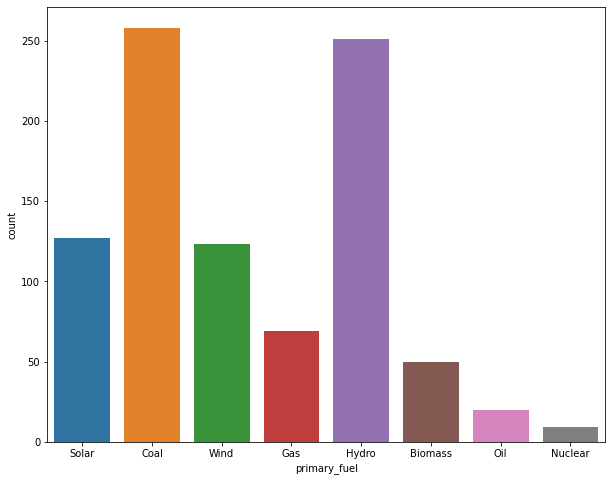

In [41]:
plt.figure(figsize=(10,8))
sb.countplot(df['primary_fuel'])

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='other_fuel1', ylabel='count'>

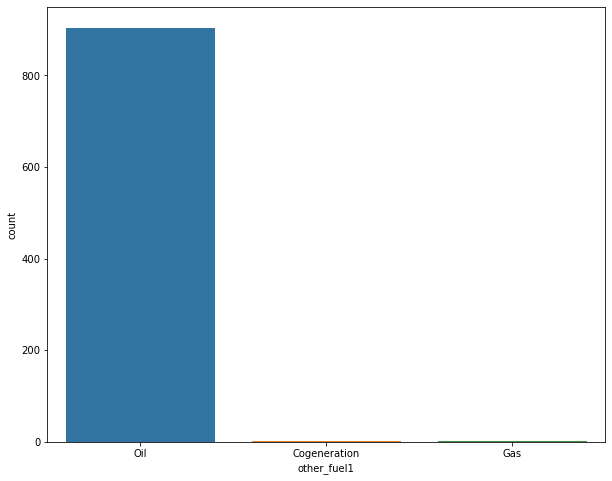

In [42]:
plt.figure(figsize=(10,8))
print(df['other_fuel1'].value_counts())
sb.countplot(df['other_fuel1'])

WRI                                     784
Industry About                          119
National Renewable Energy Laboratory      4
Name: geolocation_source, dtype: int64


B:\i new\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='geolocation_source', ylabel='count'>

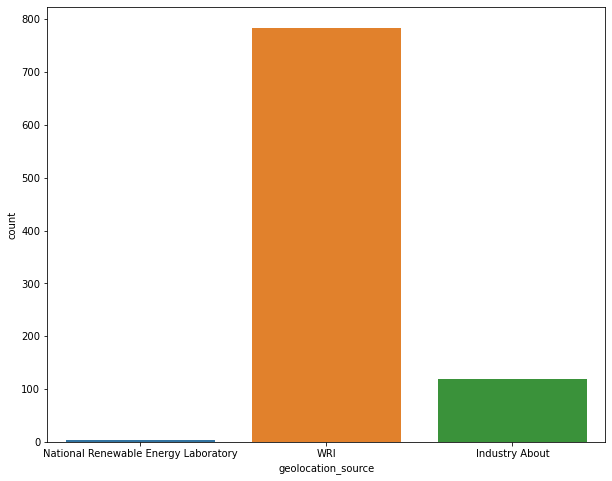

In [43]:
plt.figure(figsize=(10,8))
print(df['geolocation_source'].value_counts())
sb.countplot(df['geolocation_source'])

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2014'>

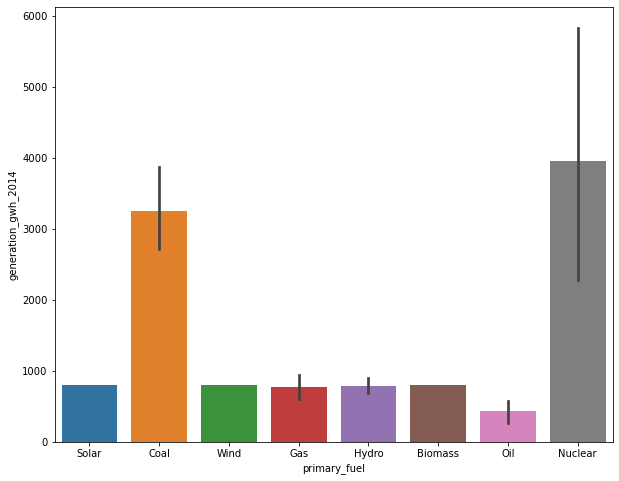

In [44]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['generation_gwh_2014'],x=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2015'>

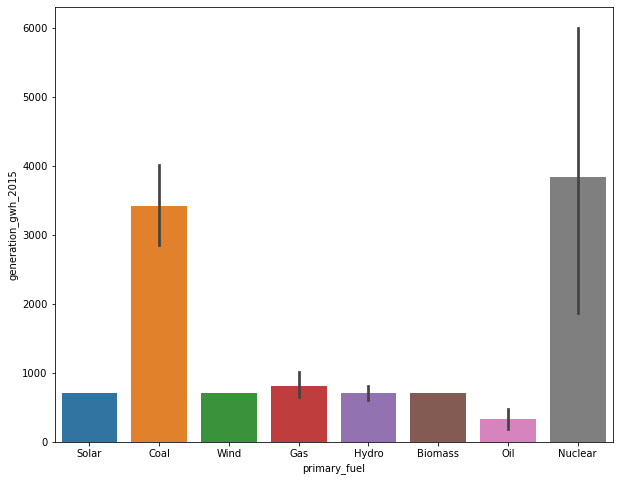

In [45]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['generation_gwh_2015'],x=df['primary_fuel'],data=df)

### as we see at year 2015 energy generated is 3800 giga_watt_perhour by Nuclear, but data has outliers. so, we need to analysize more.

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2016'>

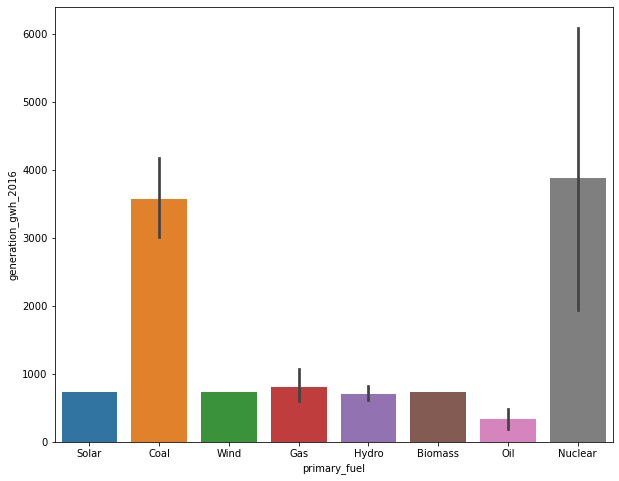

In [46]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['generation_gwh_2016'],x=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2017'>

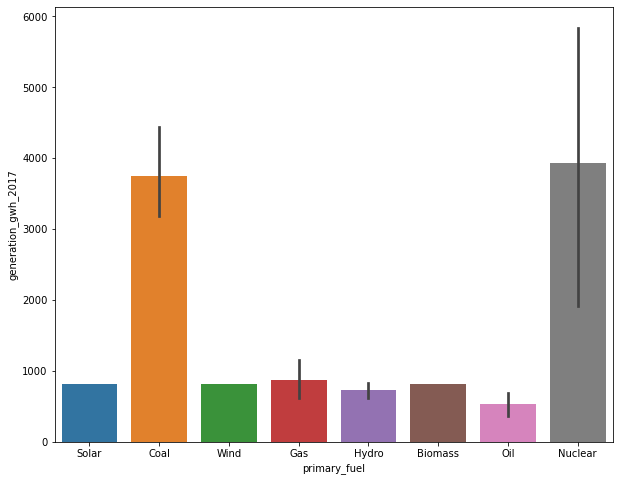

In [47]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['generation_gwh_2017'],x=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='generation_gwh_2018'>

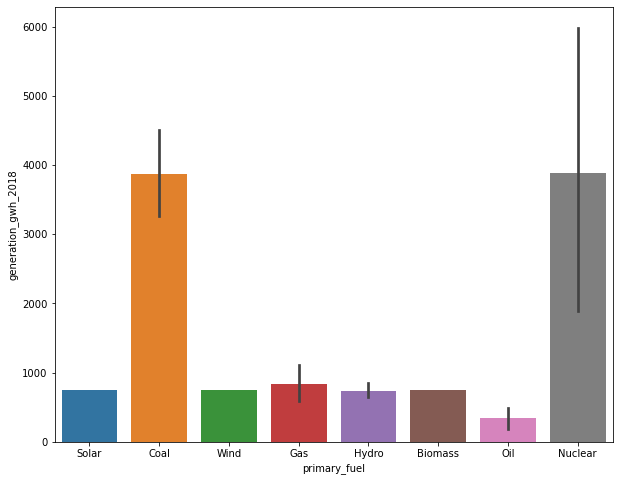

In [48]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['generation_gwh_2018'],x=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='primary_fuel', ylabel='capacity_mw'>

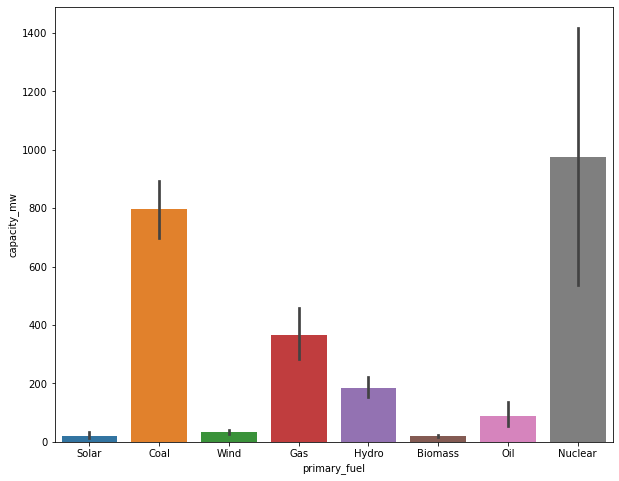

In [49]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['capacity_mw'],x=df['primary_fuel'],data=df)

As we see Nuclear generate more energy,but in data there are lots of outliers

<AxesSubplot:xlabel='other_fuel1', ylabel='capacity_mw'>

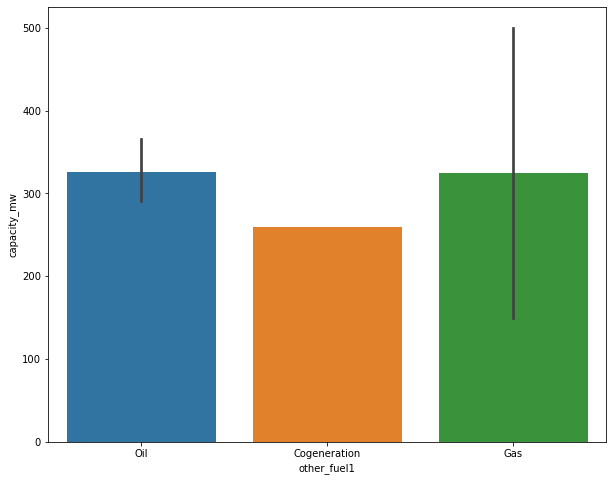

In [50]:
plt.figure(figsize=(10,8))
sb.barplot(y=df['capacity_mw'],x=df['other_fuel1'],data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

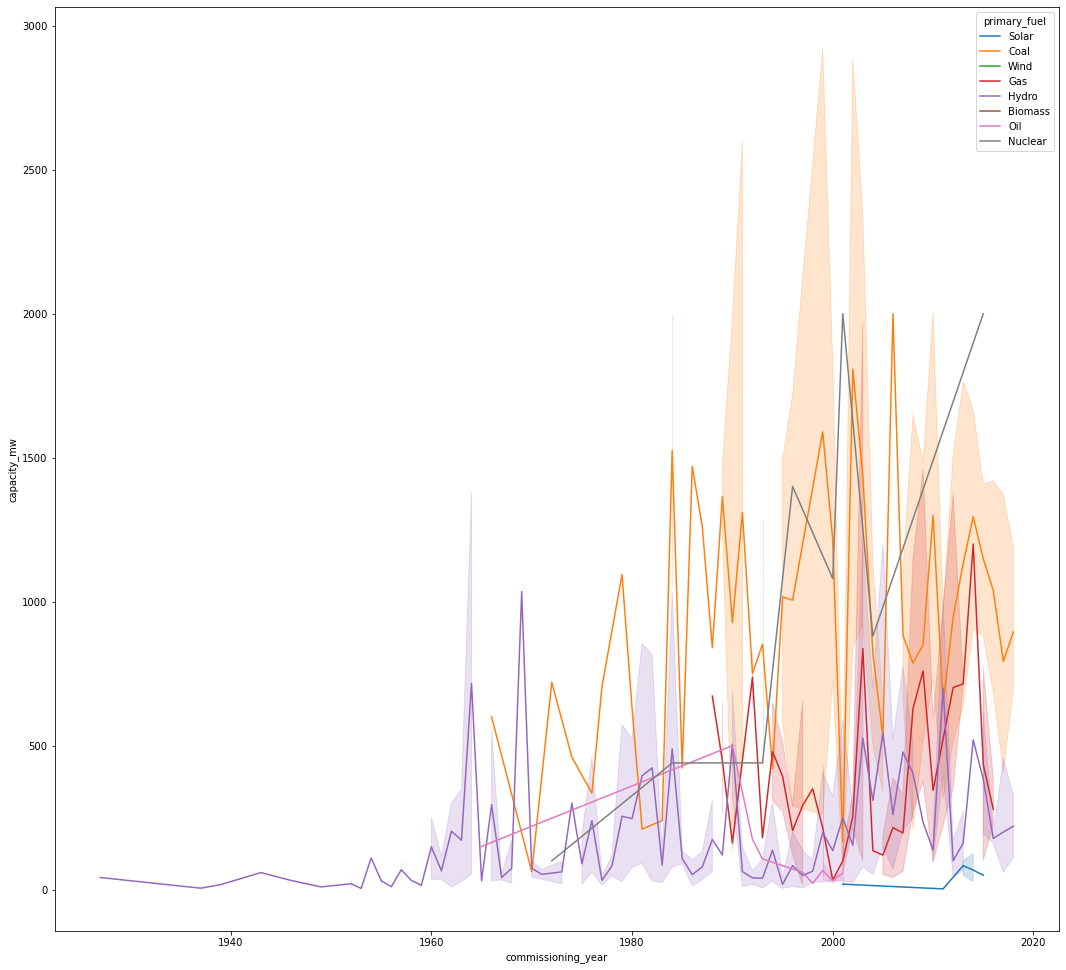

In [51]:
plt.figure(figsize=(18,17))
sb.lineplot(x=df['commissioning_year'],y=df['capacity_mw'],hue=df['primary_fuel'],data=df)

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

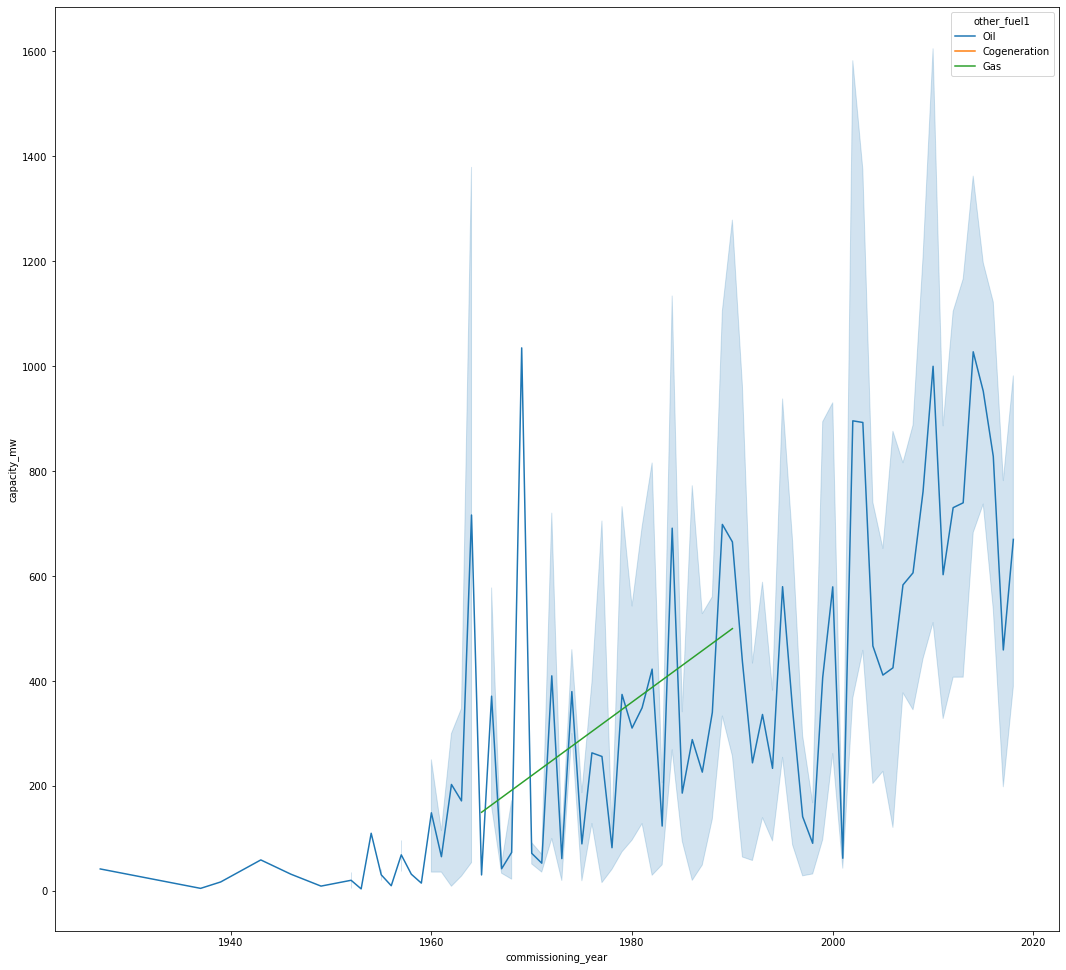

In [52]:

plt.figure(figsize=(18,17))
sb.lineplot(x=df['commissioning_year'],y=df['capacity_mw'],hue=df['other_fuel1'],data=df)

As observation we can say that as every comissioning year we see setup of new power generation plant and this power generation is done by using oil
- as it do not come under primary categories but still oil dominated in its categories ie. other_fuel.

Coal       258
Hydro      251
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         20
Nuclear      9
Name: primary_fuel, dtype: int64


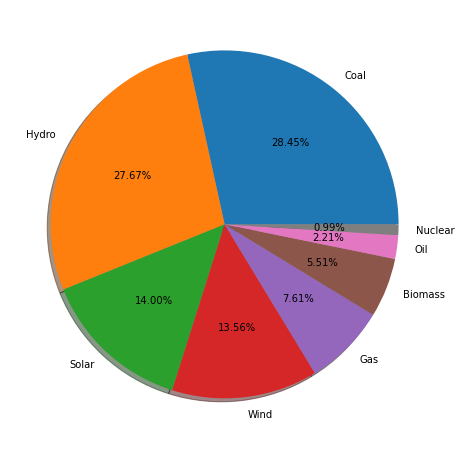

In [53]:
print(df['primary_fuel'].value_counts())
labels='Coal','Hydro','Solar','Wind','Gas','Biomass','Oil','Nuclear'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['primary_fuel'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

so data show this:-----
Coal :- 28.45%  Hydro:-27.64%   Solar:-14%  Wind :-13.56%   Gas:-7.61%   Biomass:-5.51%  Oil:-2.21%  Nuclear:-0.99%

clearly,we say that{ Coal > Hydro > Solar  >  Wind > Gas  > Biomass > Oil > Nuclear}

Oil             904
Gas               2
Cogeneration      1
Name: other_fuel1, dtype: int64


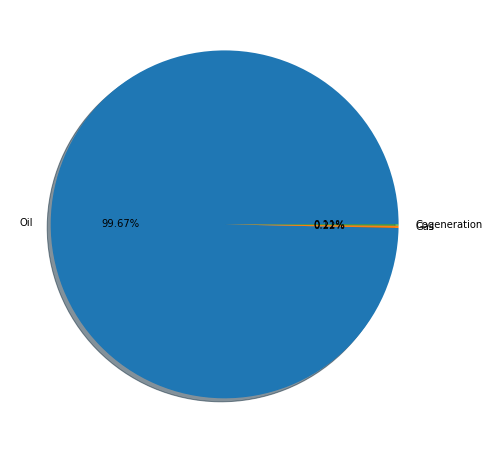

In [54]:
print(df['other_fuel1'].value_counts())
labels='Oil','Gas','Cogeneration'
fig, ax = plt.subplots(figsize=(10,8))
ax.pie(df['other_fuel1'].value_counts(),labels=labels, autopct='%1.2f%%', shadow=True)
plt.show()

### It shows how oil in other fuel covering almost 99.67%. and other just the 0.22% which is very very small.

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

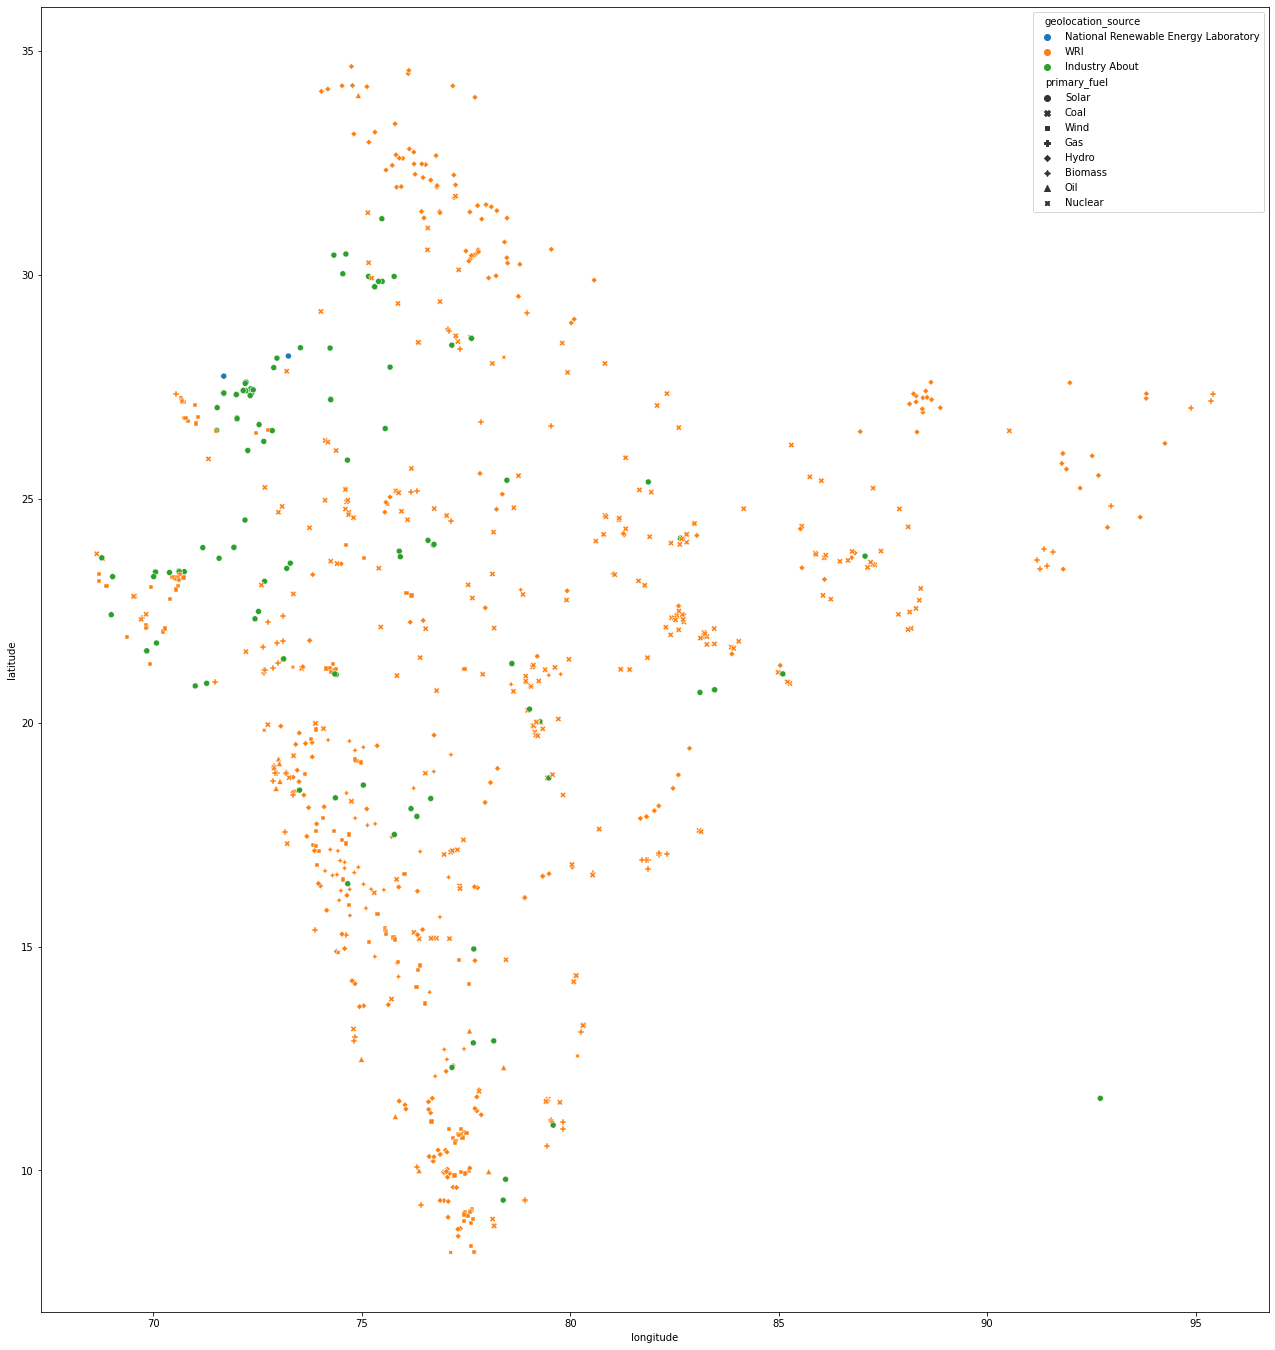

In [55]:
plt.figure(figsize=(22,24))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['geolocation_source'],style=df['primary_fuel'])

longititude and latitude of all the position in INDIA is shown here thats why it shaped like INDIA,
as we se see WRI has highest geolocation sources and highest generation of power is done from coal, and second highest is hydro.
- geolocation_source type industry is seen most in right side here, state like Maharastra,Rajasthan,Gujrat,Karnataka,Tamil nadu,
- No indutry in area of NorthEast
- The primary fuel of industry is solar

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

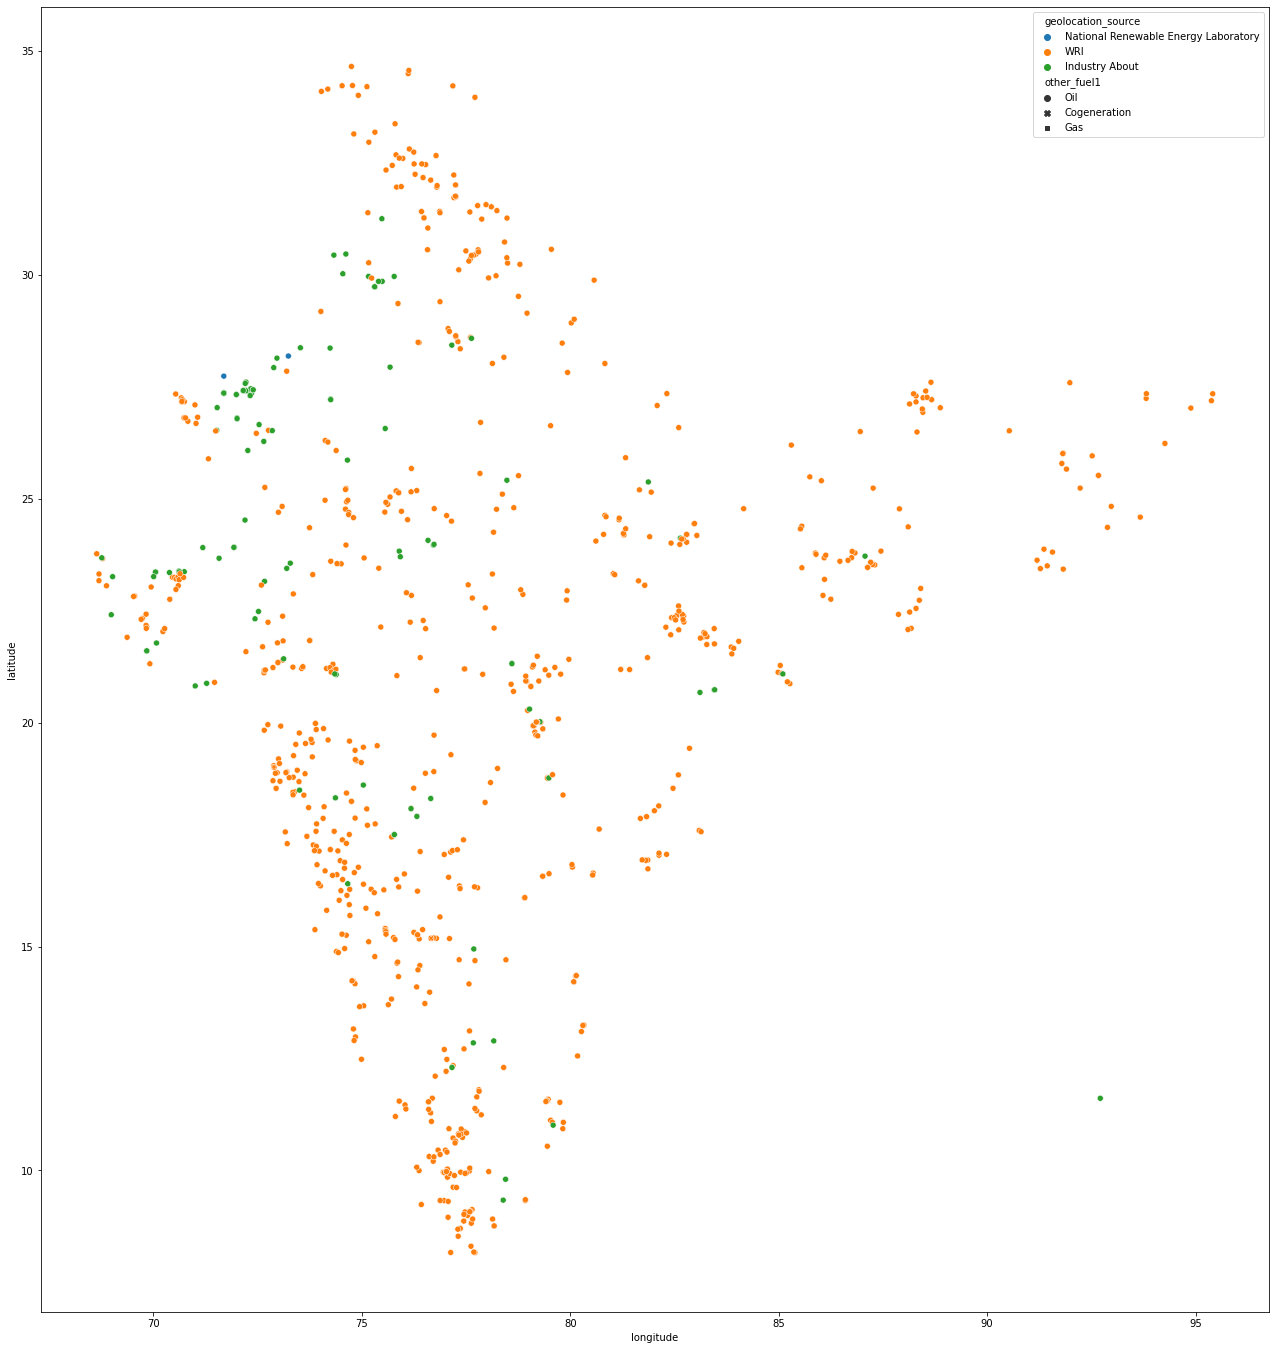

In [56]:
plt.figure(figsize=(22,24))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['geolocation_source'],style=df['other_fuel1'])

Every thing is same as compare to earlier, just the fuel is changed here and we see oil is vastaly used for generating power in other fuel
and it seen it every were in INDIA.


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

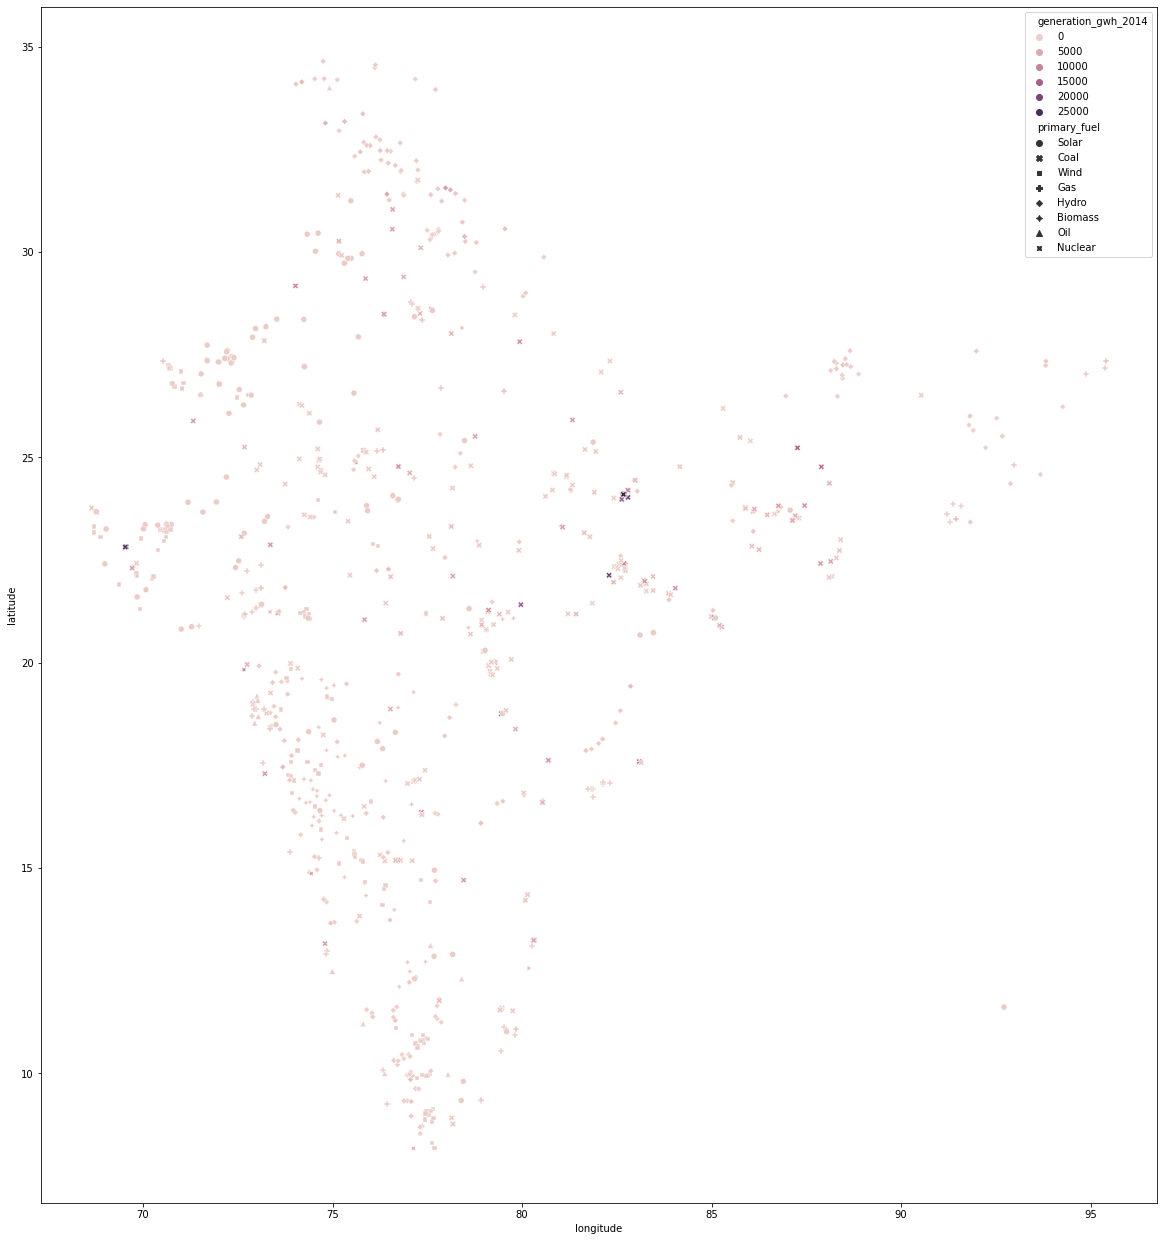

In [57]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2014'],style=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

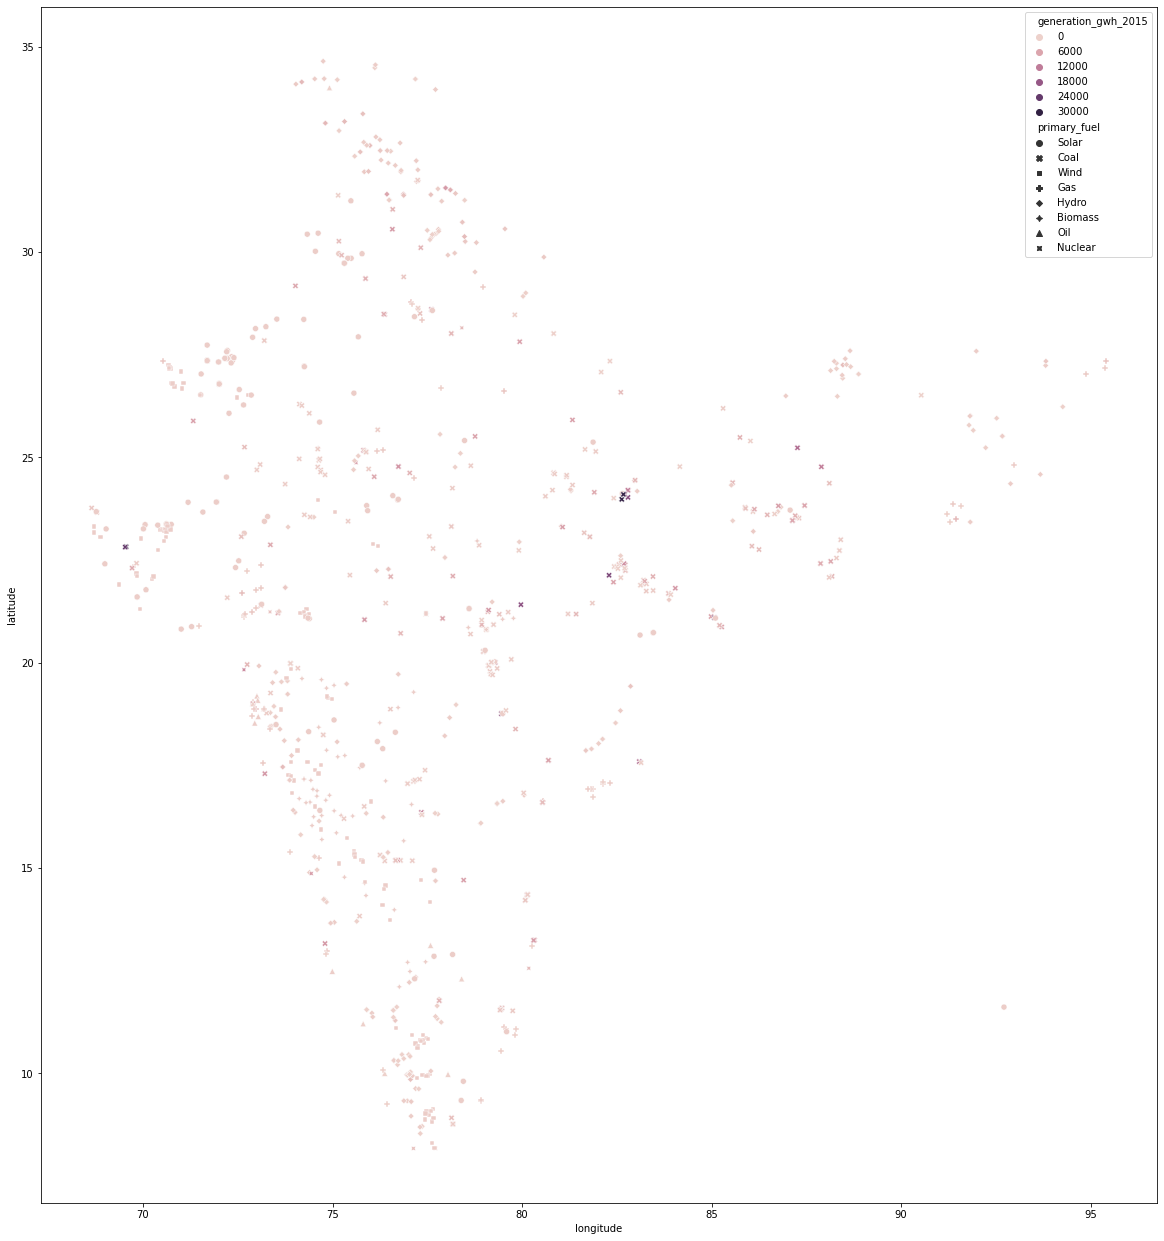

In [58]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2015'],style=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

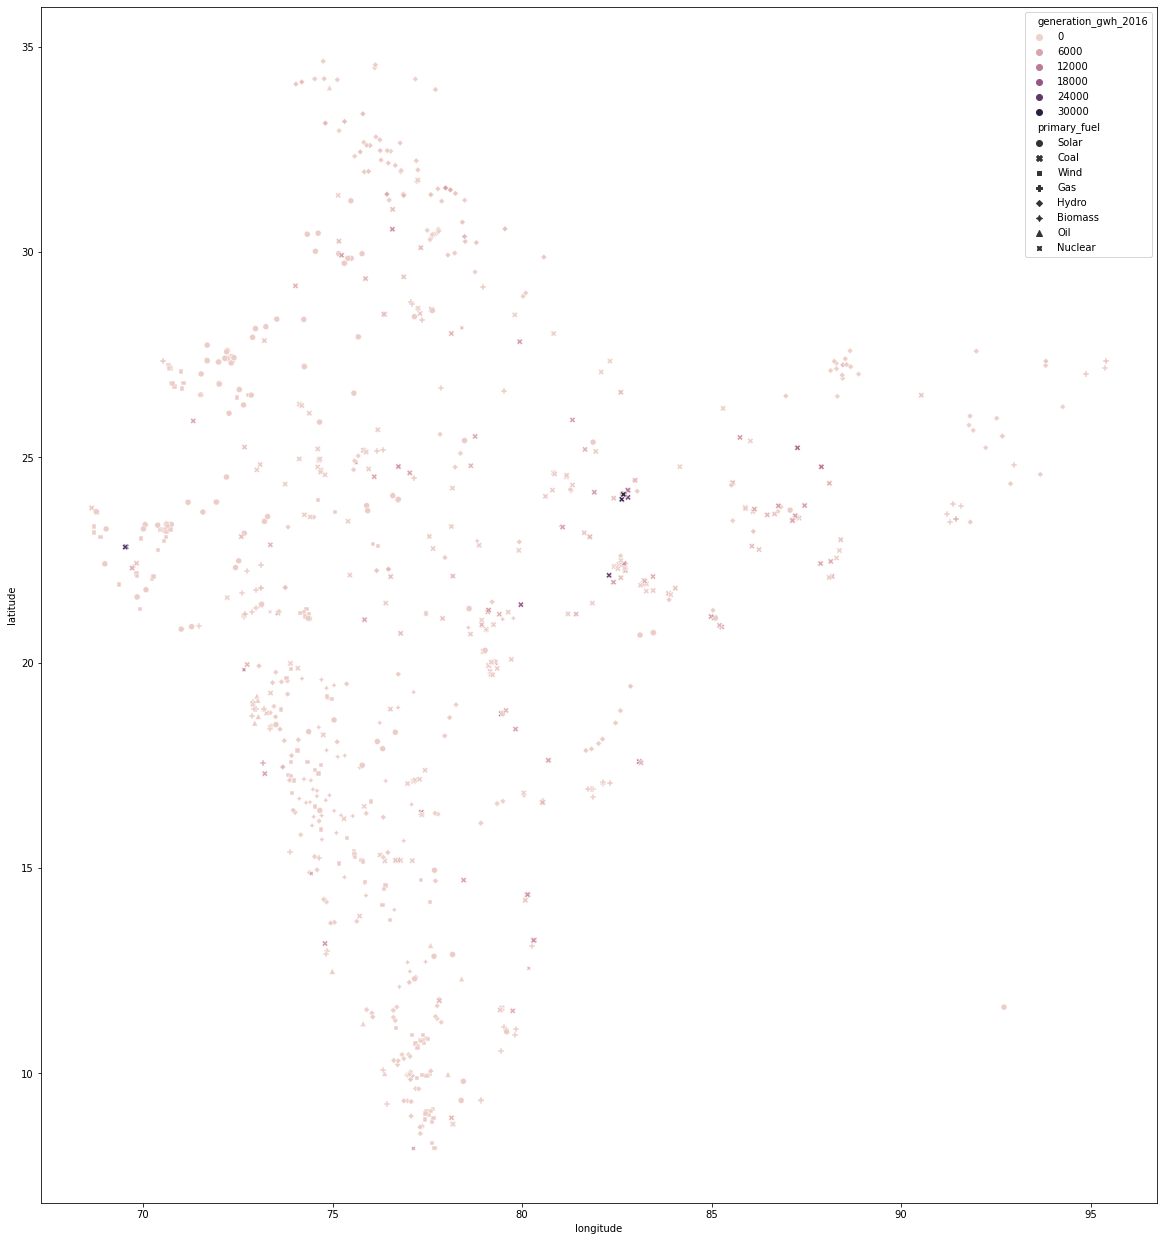

In [59]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2016'],style=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

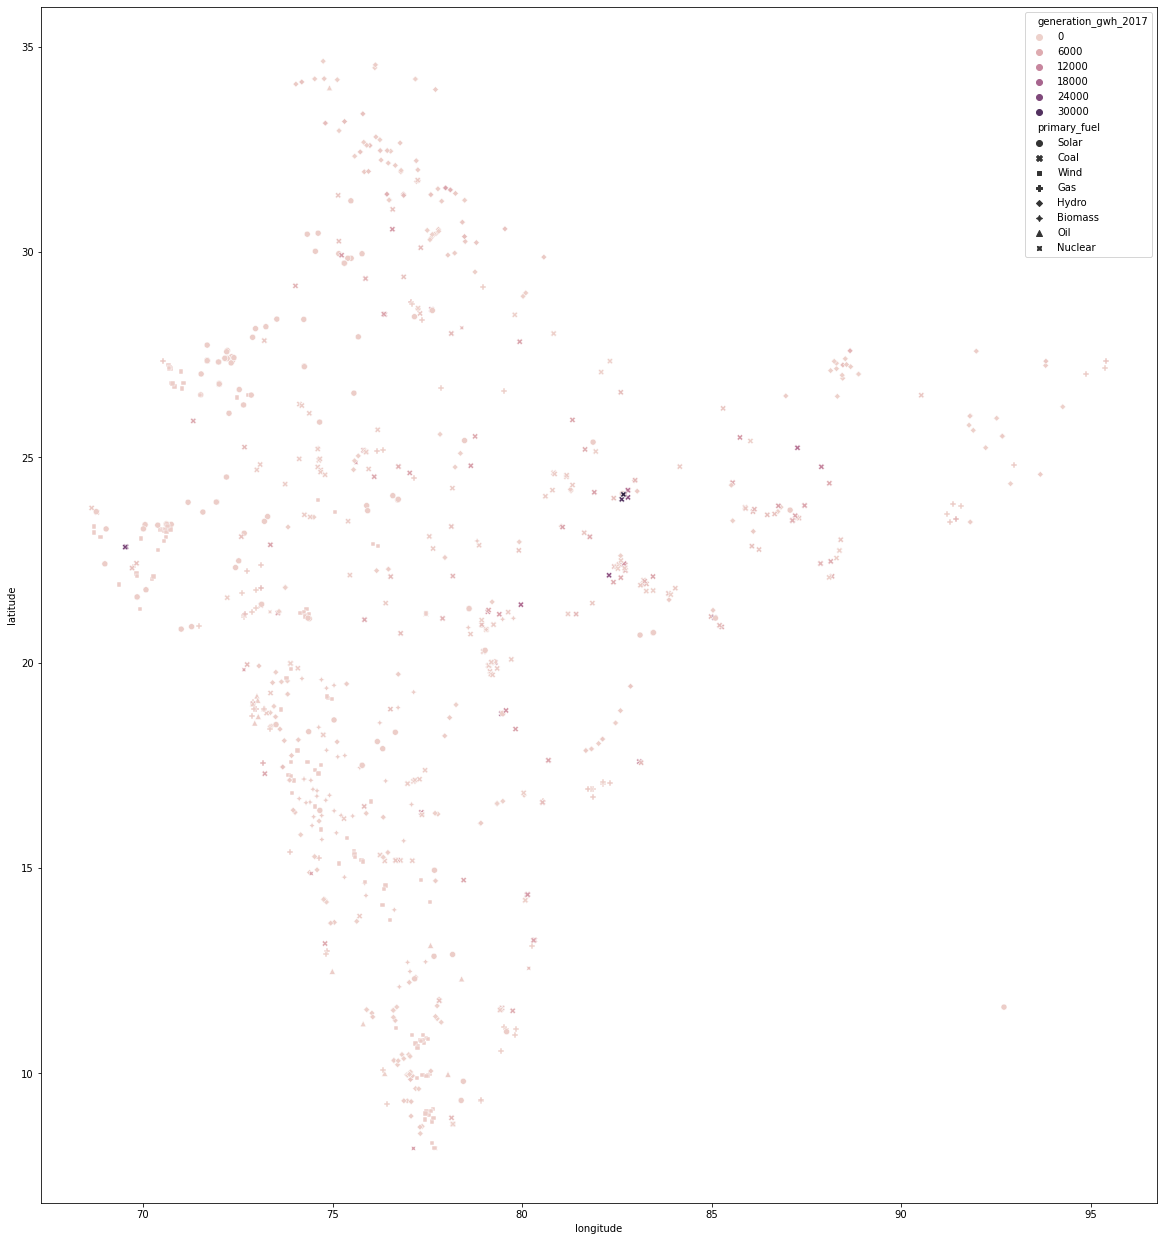

In [60]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2017'],style=df['primary_fuel'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

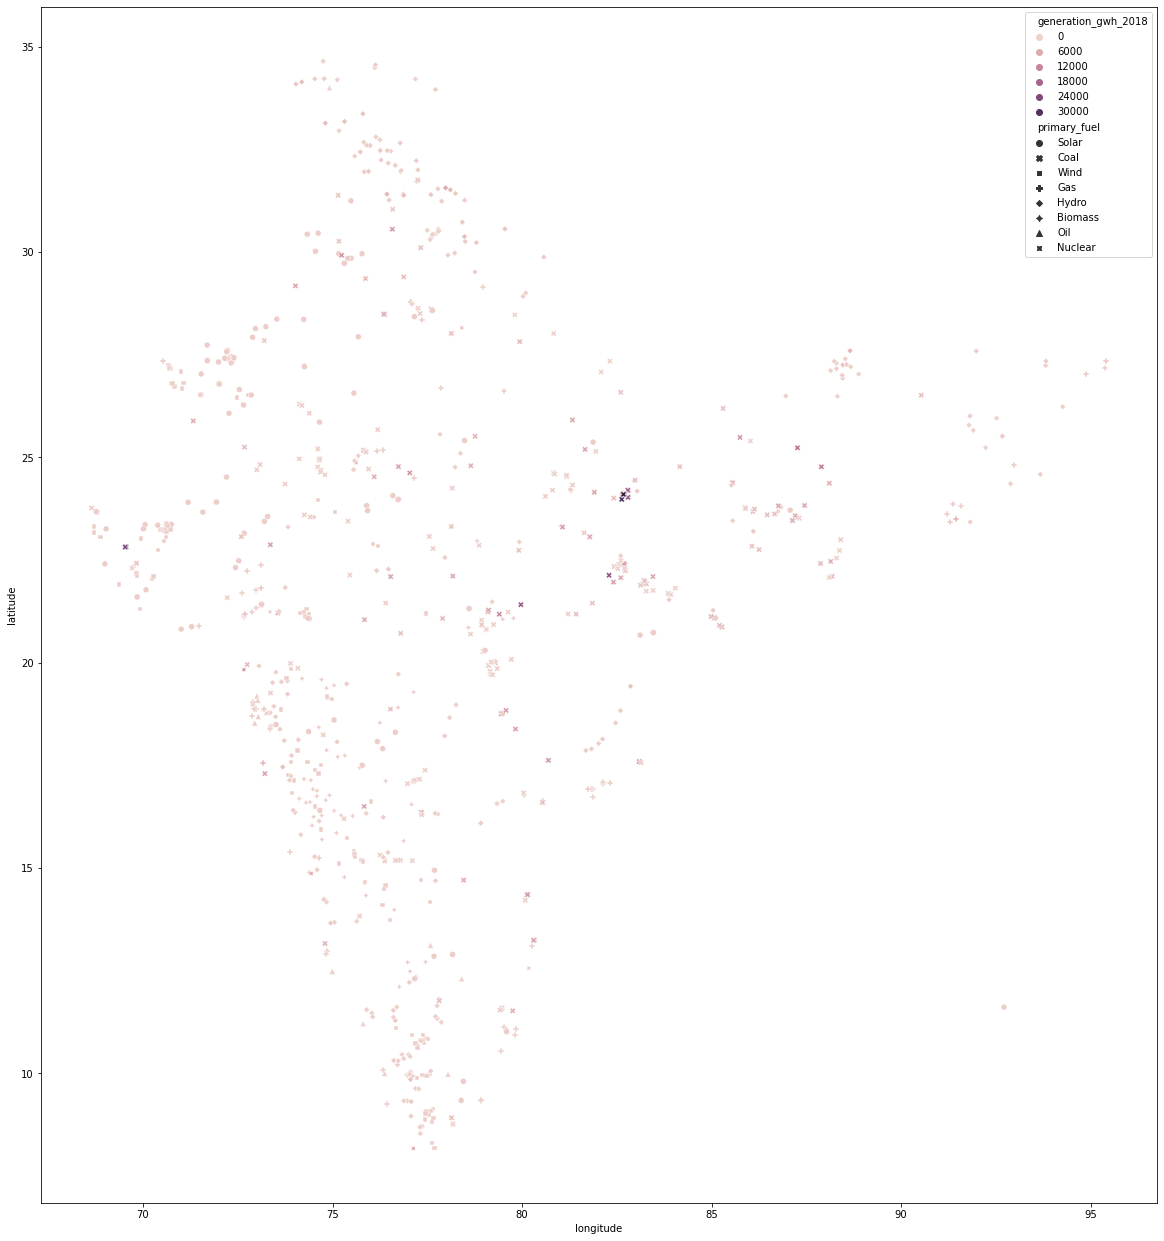

In [61]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2018'],style=df['primary_fuel'])

  - In most of production of energy is done with coal rather than any other primary fuel.
  - second highest is done by hydro 

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

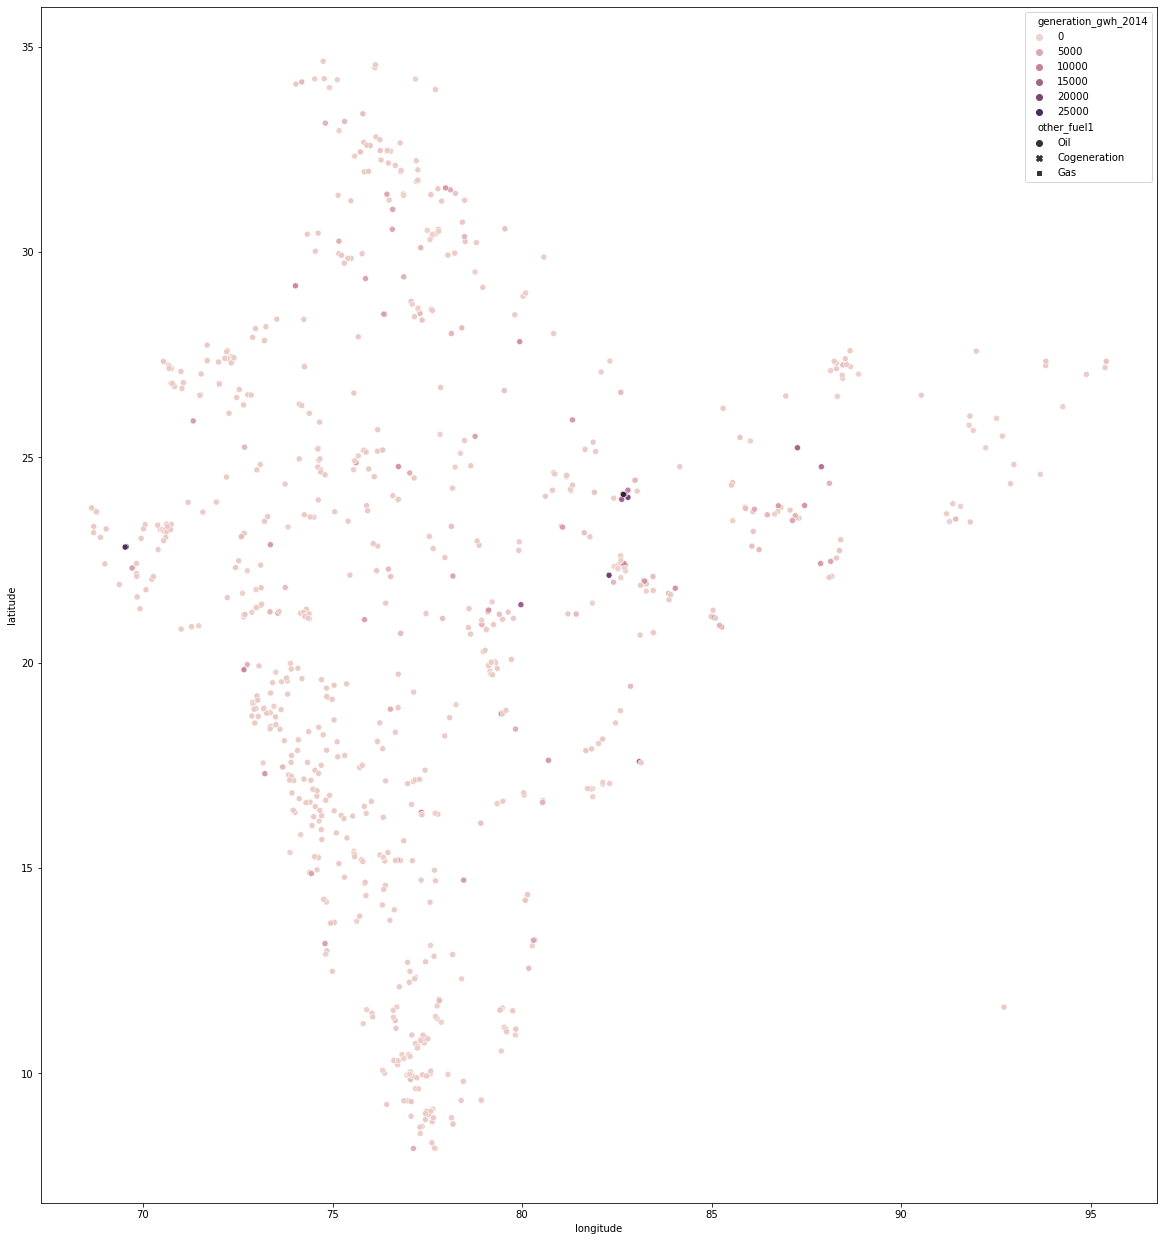

In [62]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2014'],style=df['other_fuel1'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

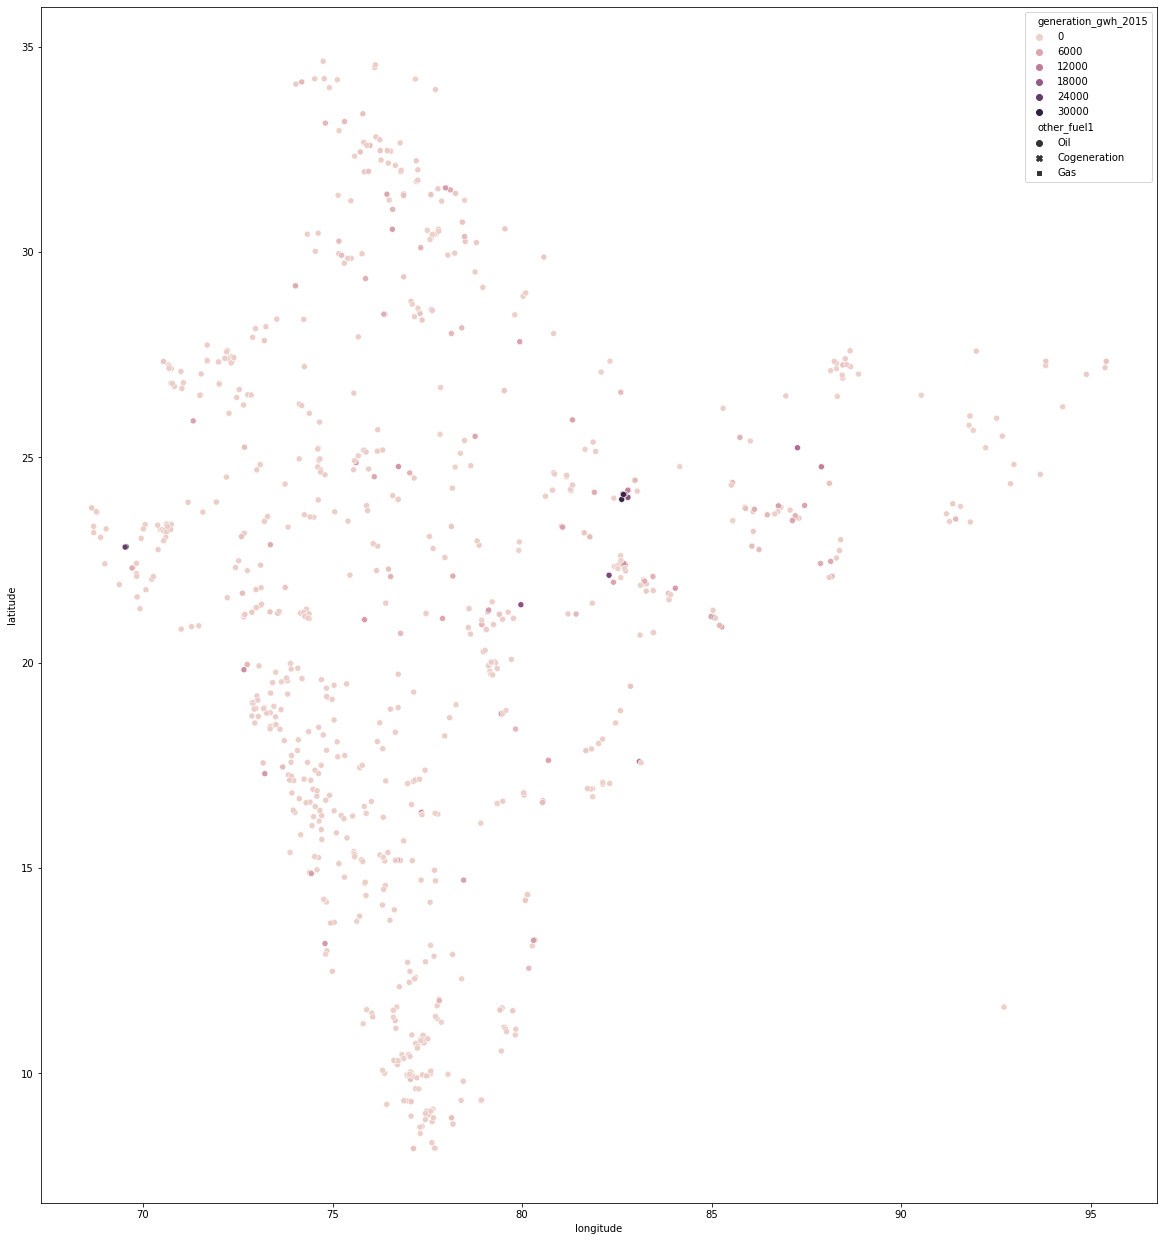

In [63]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2015'],style=df['other_fuel1'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

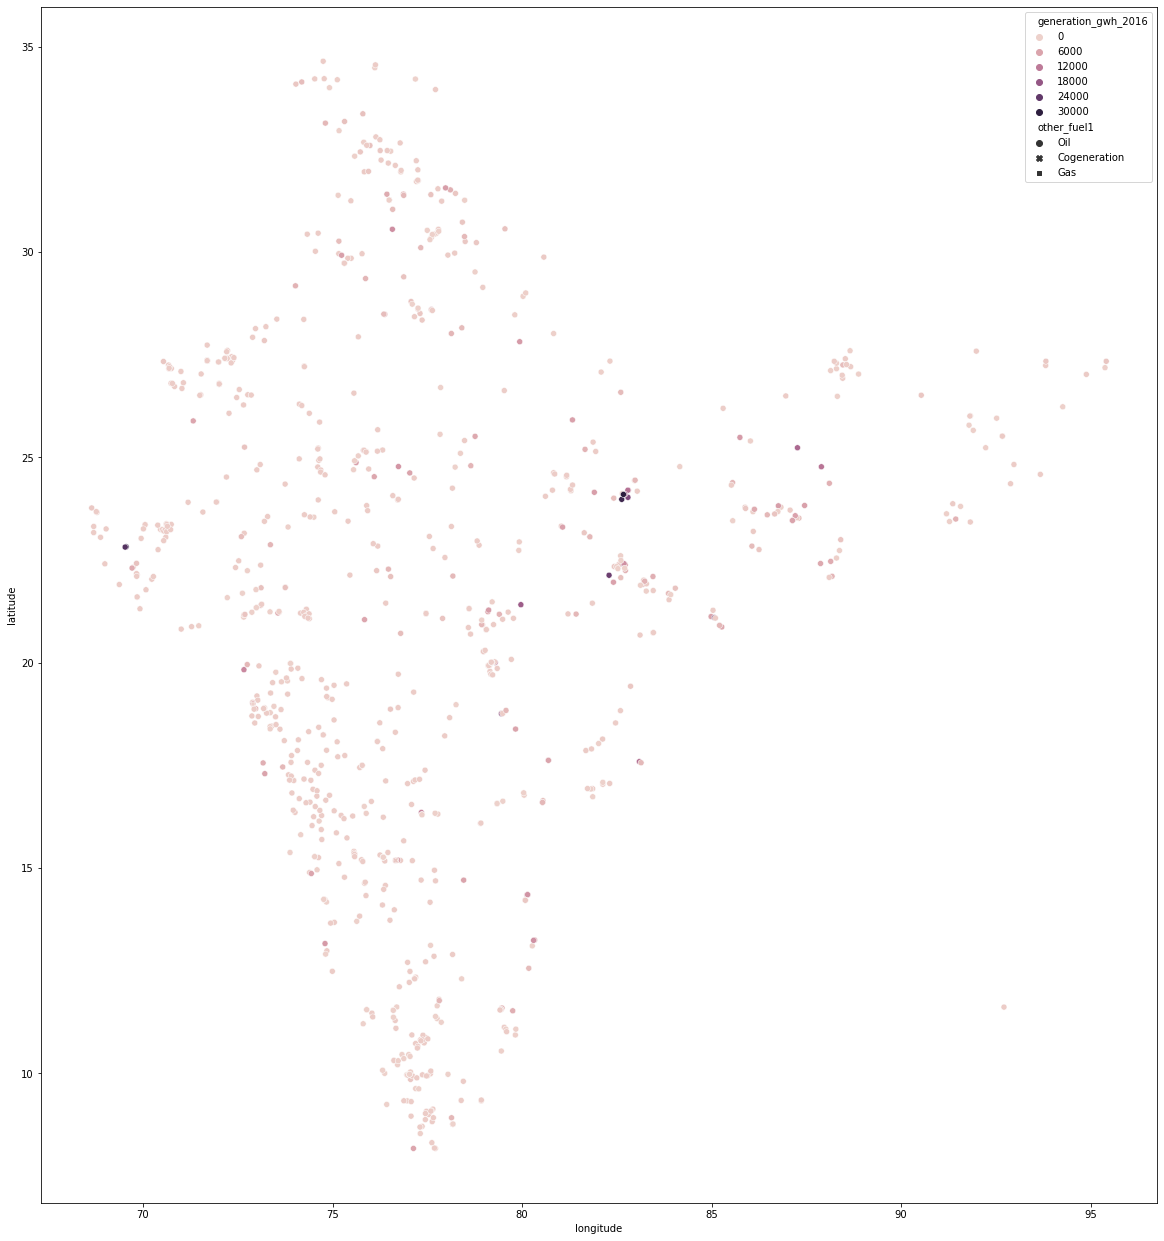

In [64]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2016'],style=df['other_fuel1'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

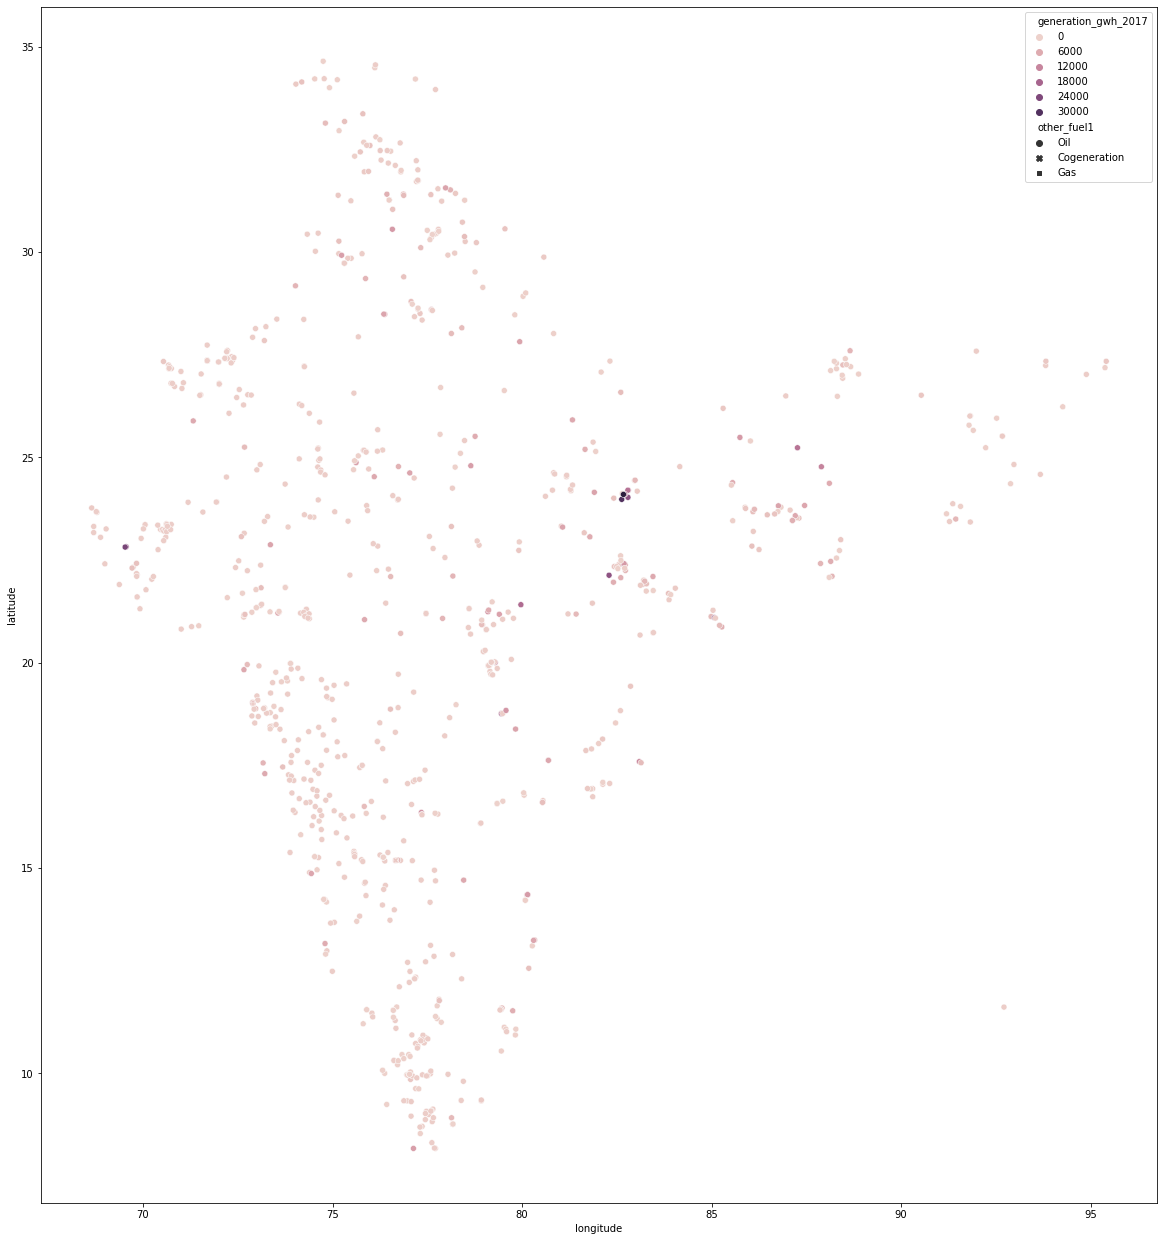

In [65]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2017'],style=df['other_fuel1'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

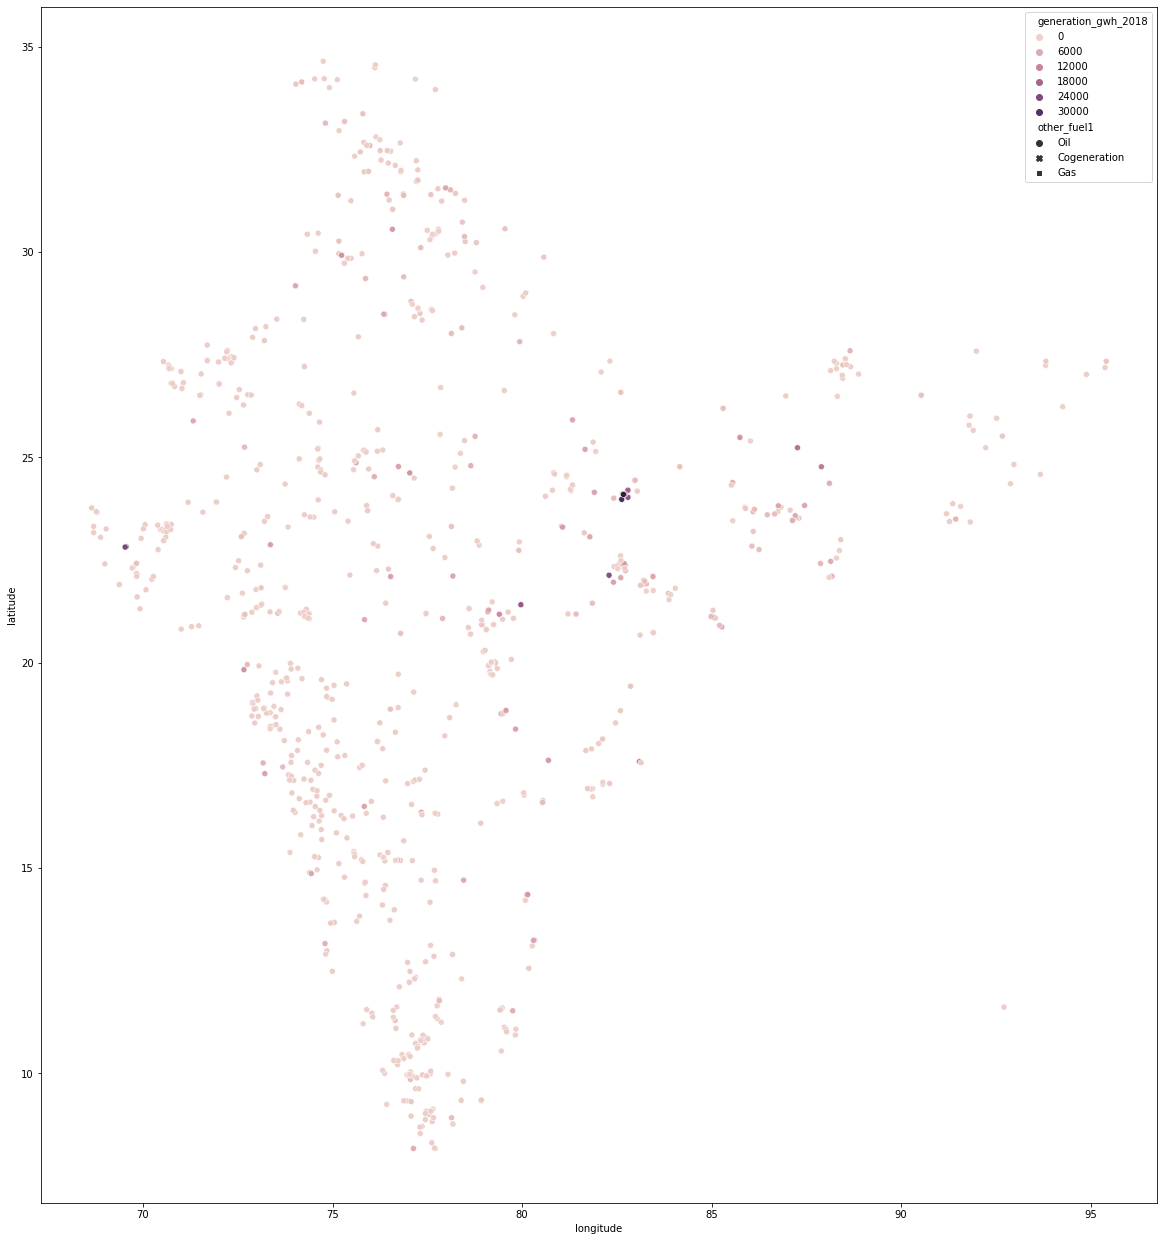

In [68]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2018'],style=df['other_fuel1'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

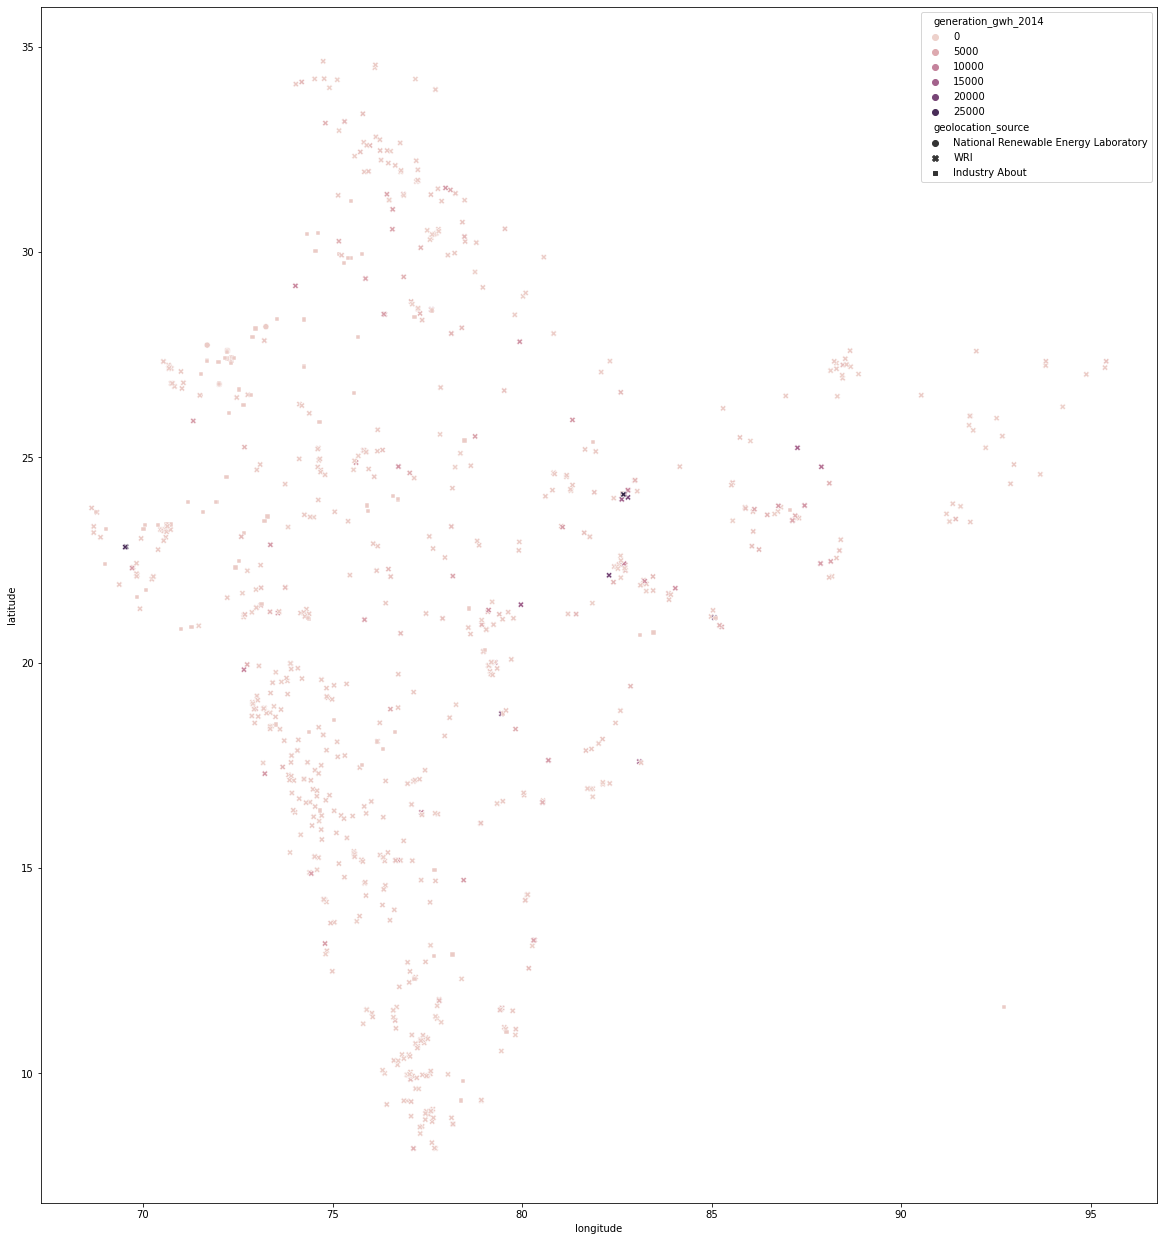

In [69]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2014'],style=df['geolocation_source'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

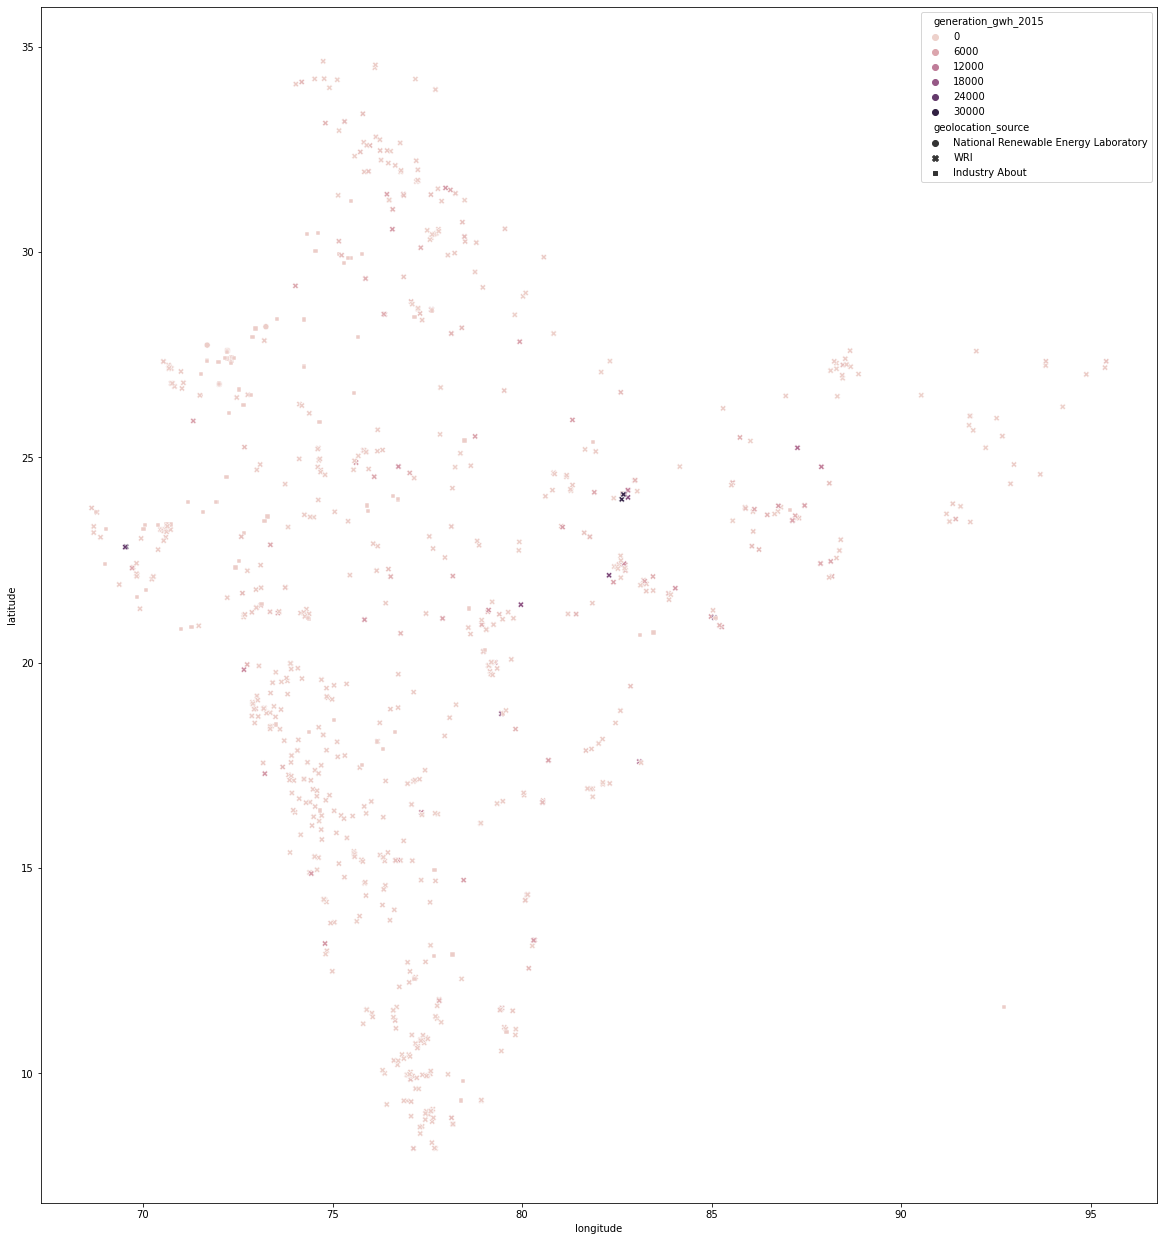

In [70]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2015'],style=df['geolocation_source'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

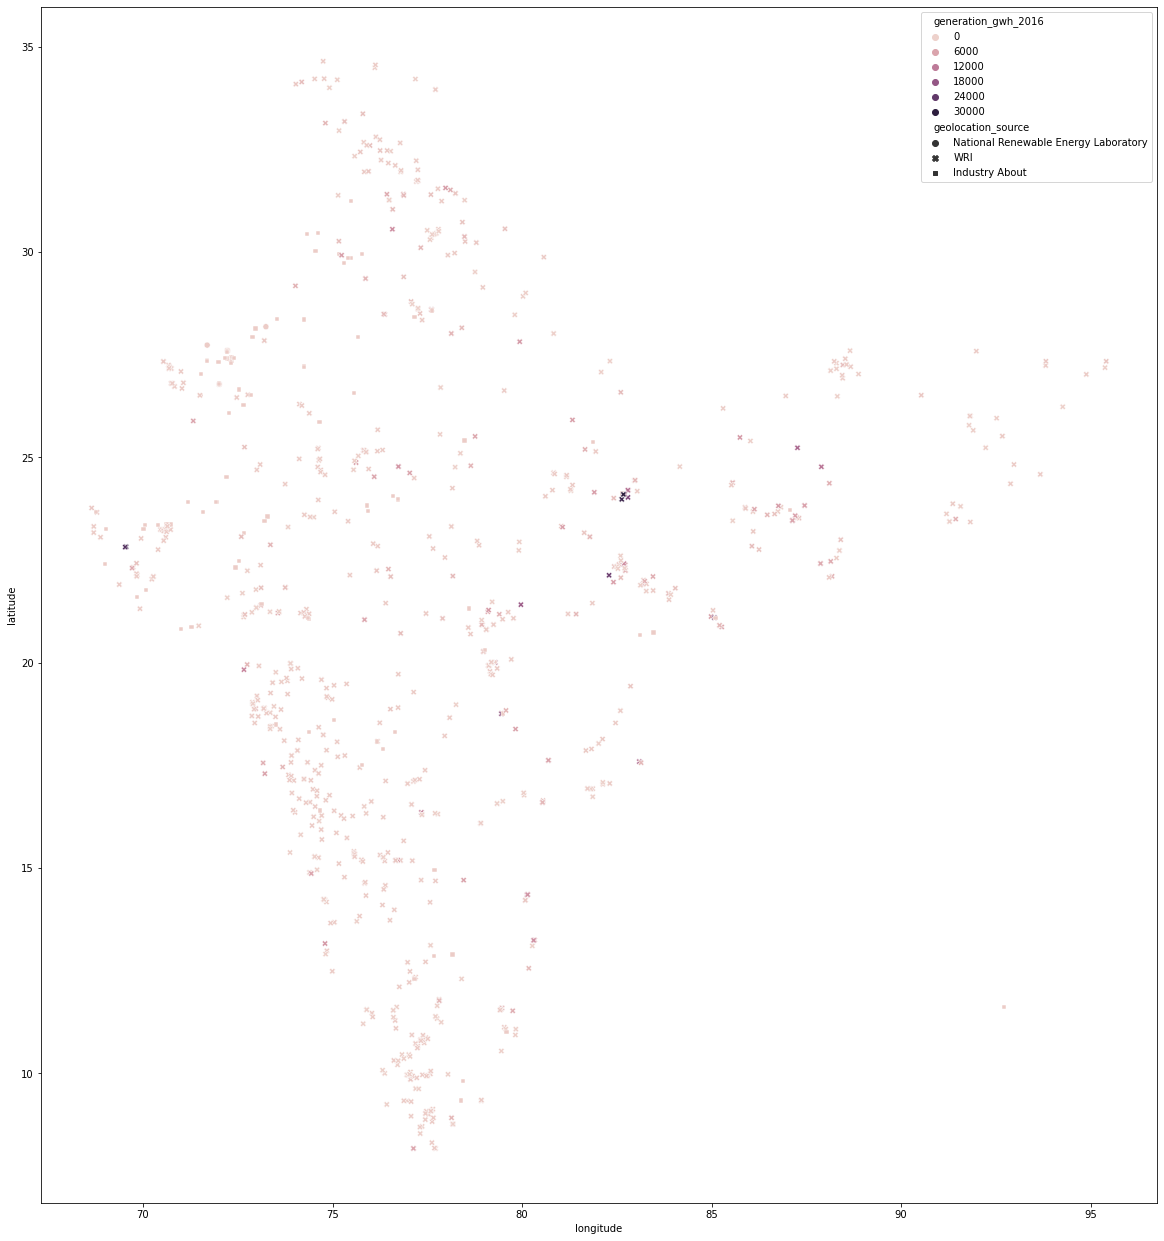

In [71]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2016'],style=df['geolocation_source'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

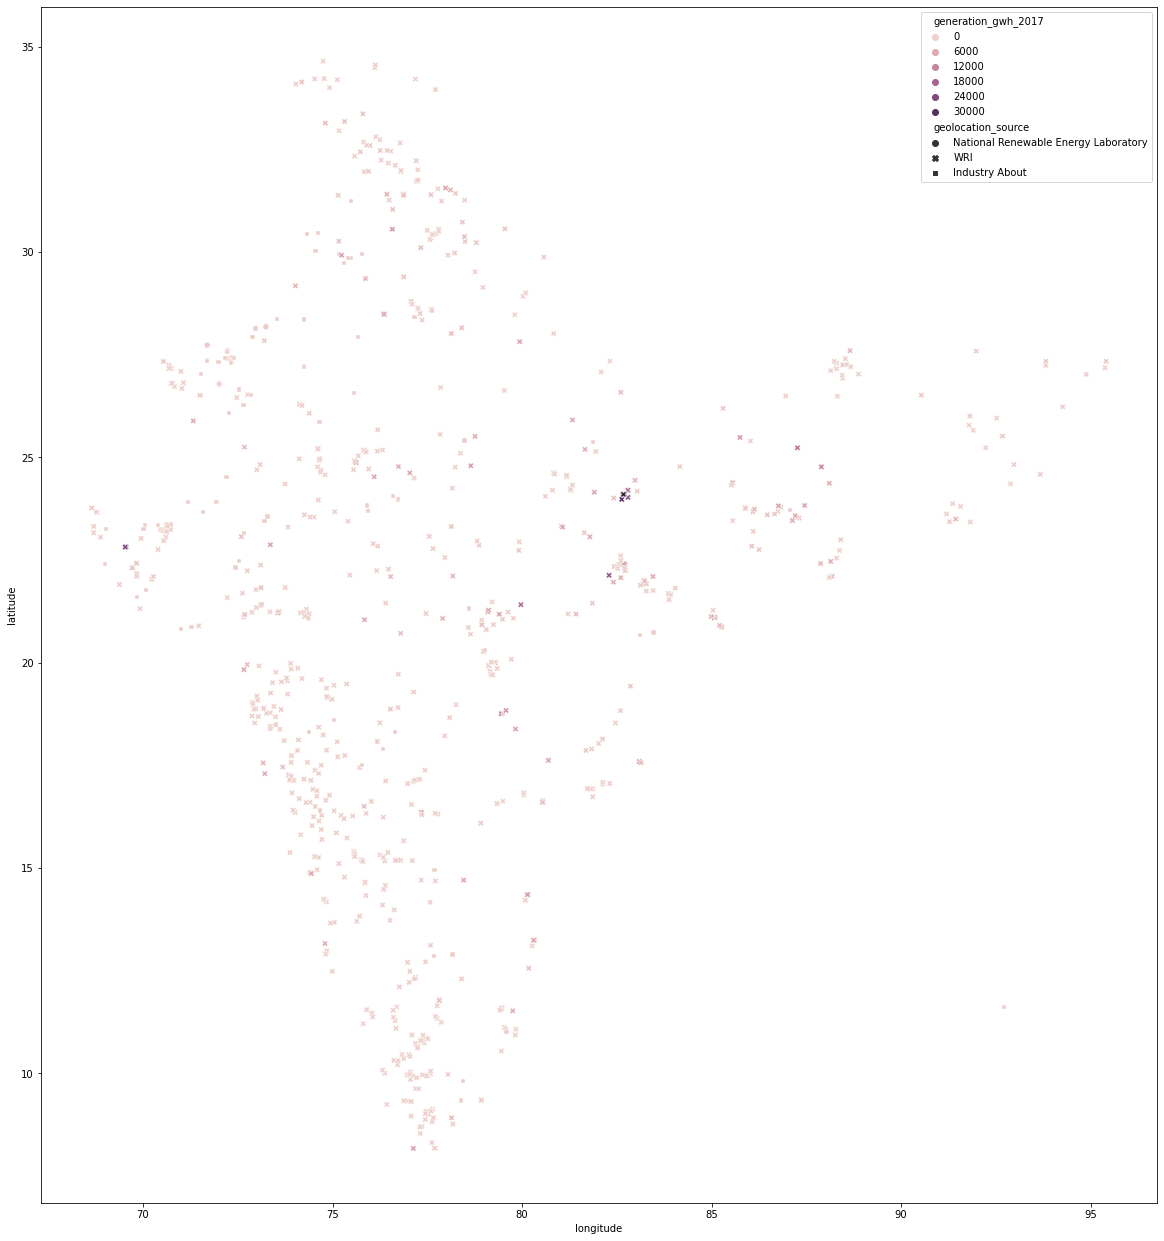

In [72]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2017'],style=df['geolocation_source'])

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

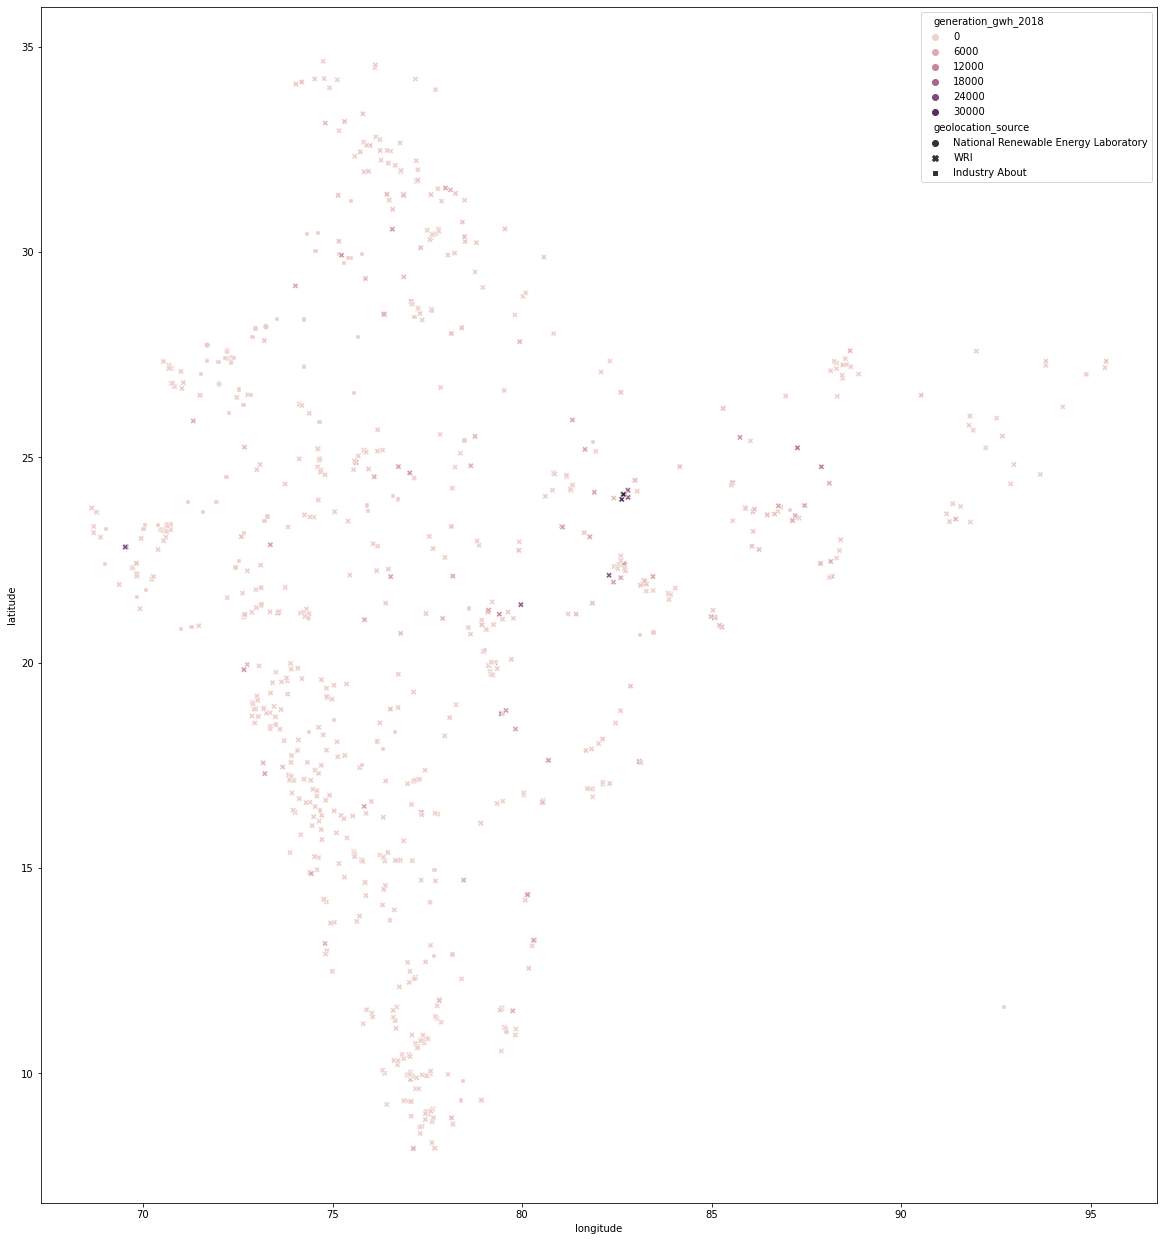

In [73]:
plt.figure(figsize=(20,22))
sb.scatterplot(x=df['longitude'],y=df['latitude'],data=df,hue=df['generation_gwh_2018'],style=df['geolocation_source'])

<AxesSubplot:xlabel='geolocation_source', ylabel='capacity_mw'>

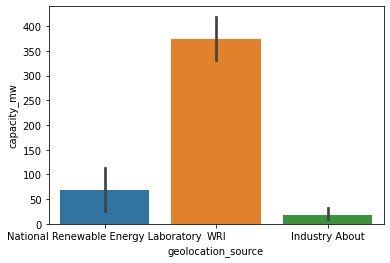

In [74]:
sb.barplot(y=df['capacity_mw'],x=df['geolocation_source'],data=df)

At energy production WRI has produced highest energy, at second NREL and 3rd Industry About 

<AxesSubplot:xlabel='commissioning_year', ylabel='capacity_mw'>

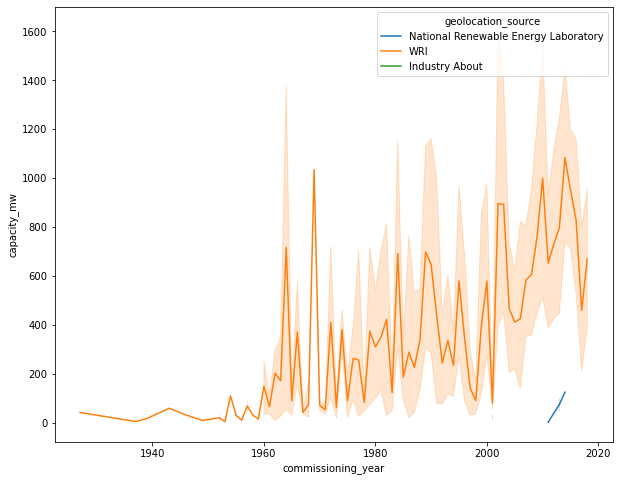

In [75]:
plt.figure(figsize=(10,8))
sb.lineplot(x=df['commissioning_year'],y=df['capacity_mw'],data=df,hue=df['geolocation_source'])

so, we observe here that World Resources Institute generating more energy than National Renewable energy Laboratory and Industry

In [76]:
df.head()
df.shape

(907, 12)

In [77]:
continous_columns=df[['capacity_mw','latitude','longitude','generation_gwh_2014','generation_gwh_2015','generation_gwh_2016','generation_gwh_2017','generation_gwh_2018']]

# Checking skewness and outliers

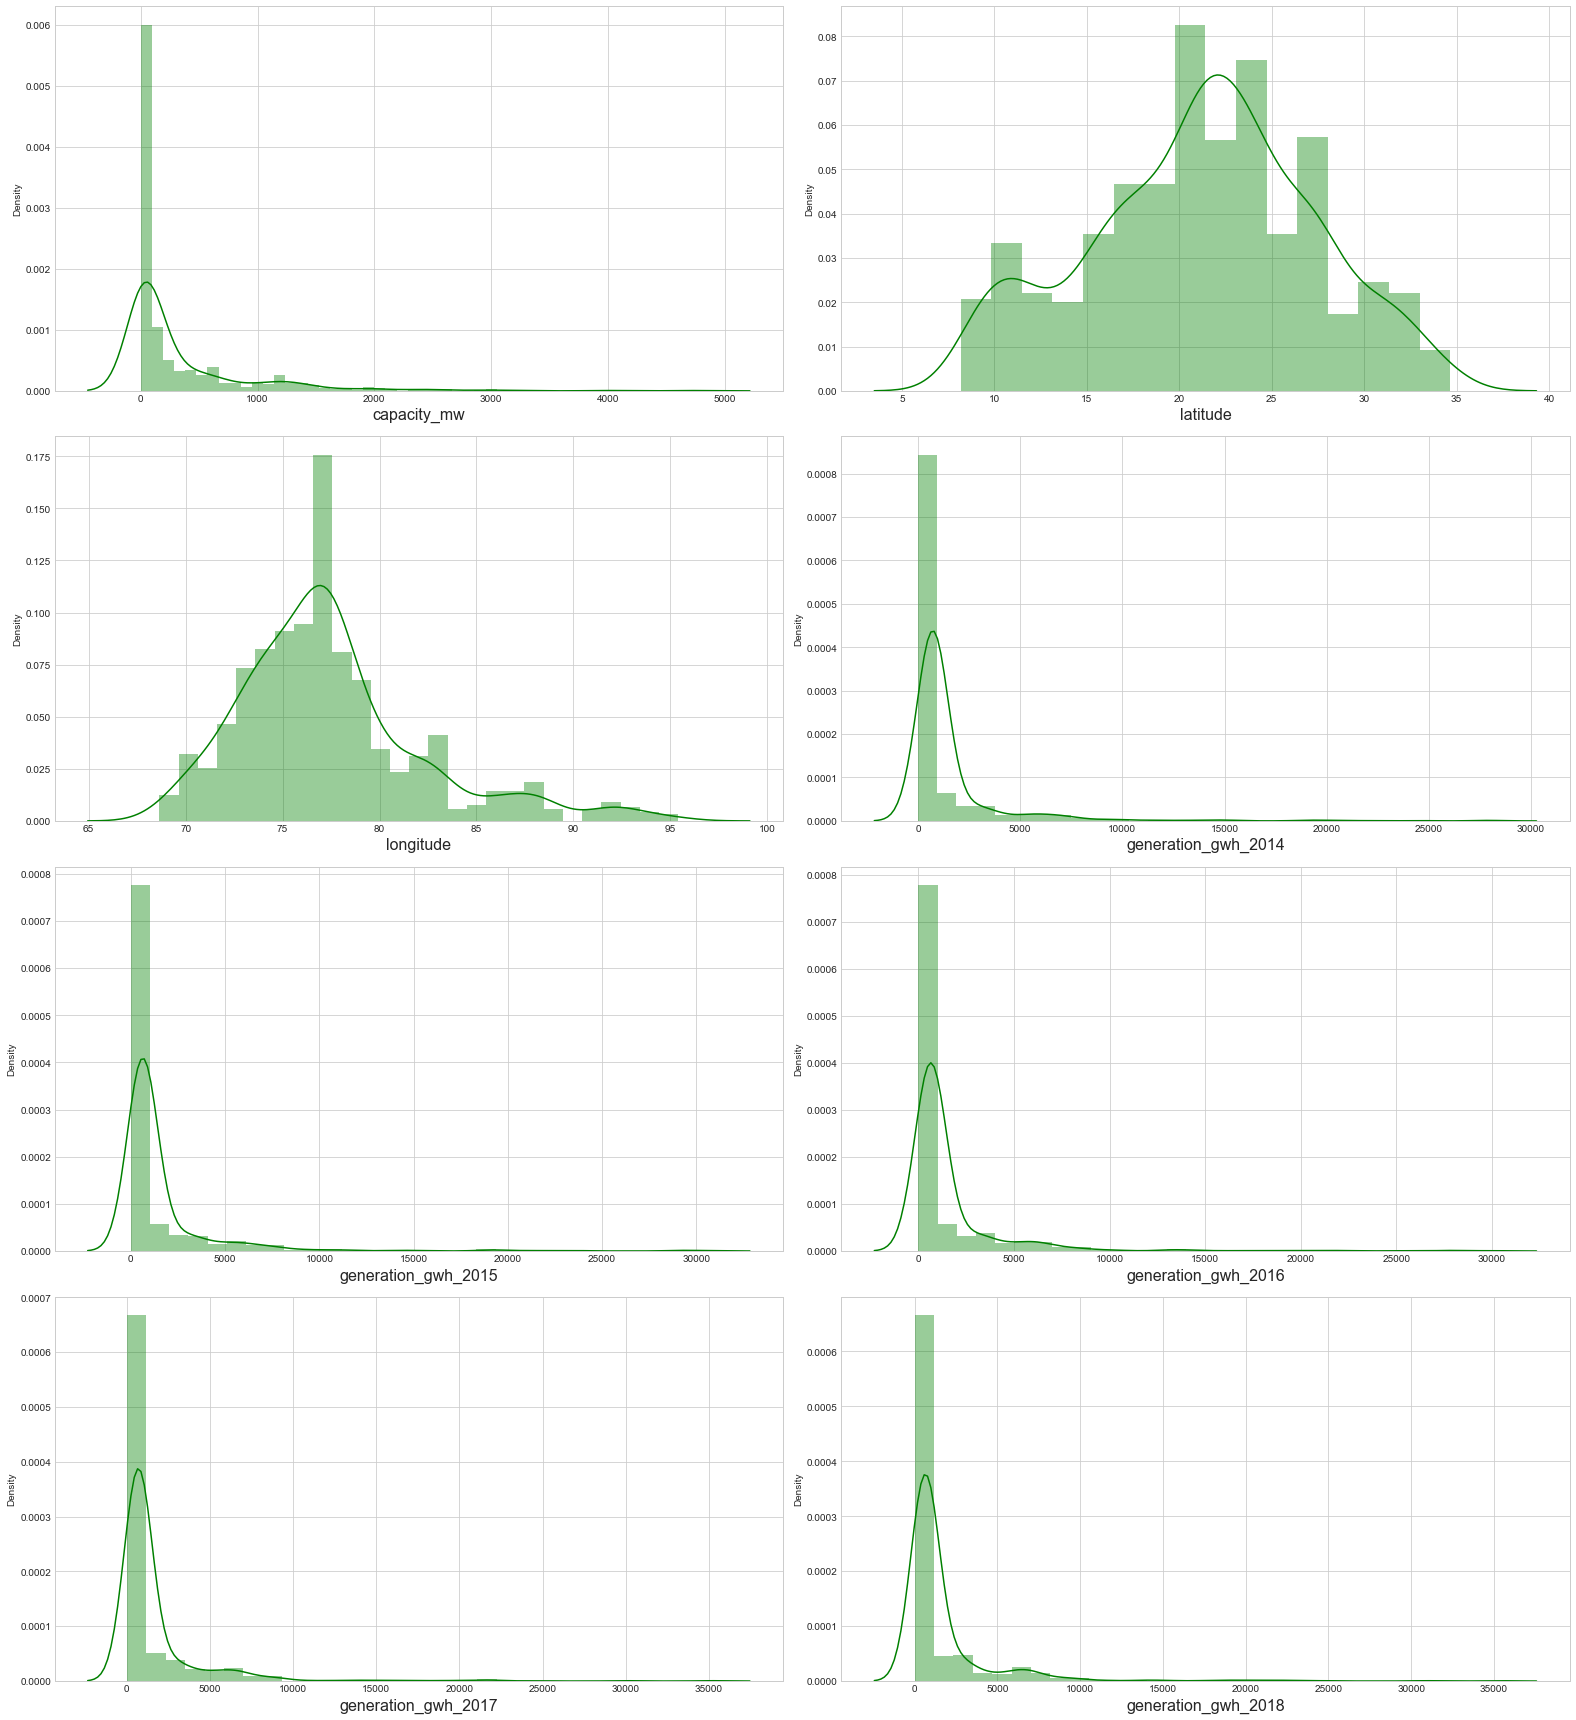

In [78]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(22,24))
num=1

for columns in continous_columns:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.distplot(continous_columns[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()


- As per observation latitude is not skewed but longititude is little skewed 
 - generation_gwh_2014 , generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, generation_gwh_2018 all this columns are highly skewed
 - capacity_mw also highly skewed
  
  
 - we need to remove the skewness from data

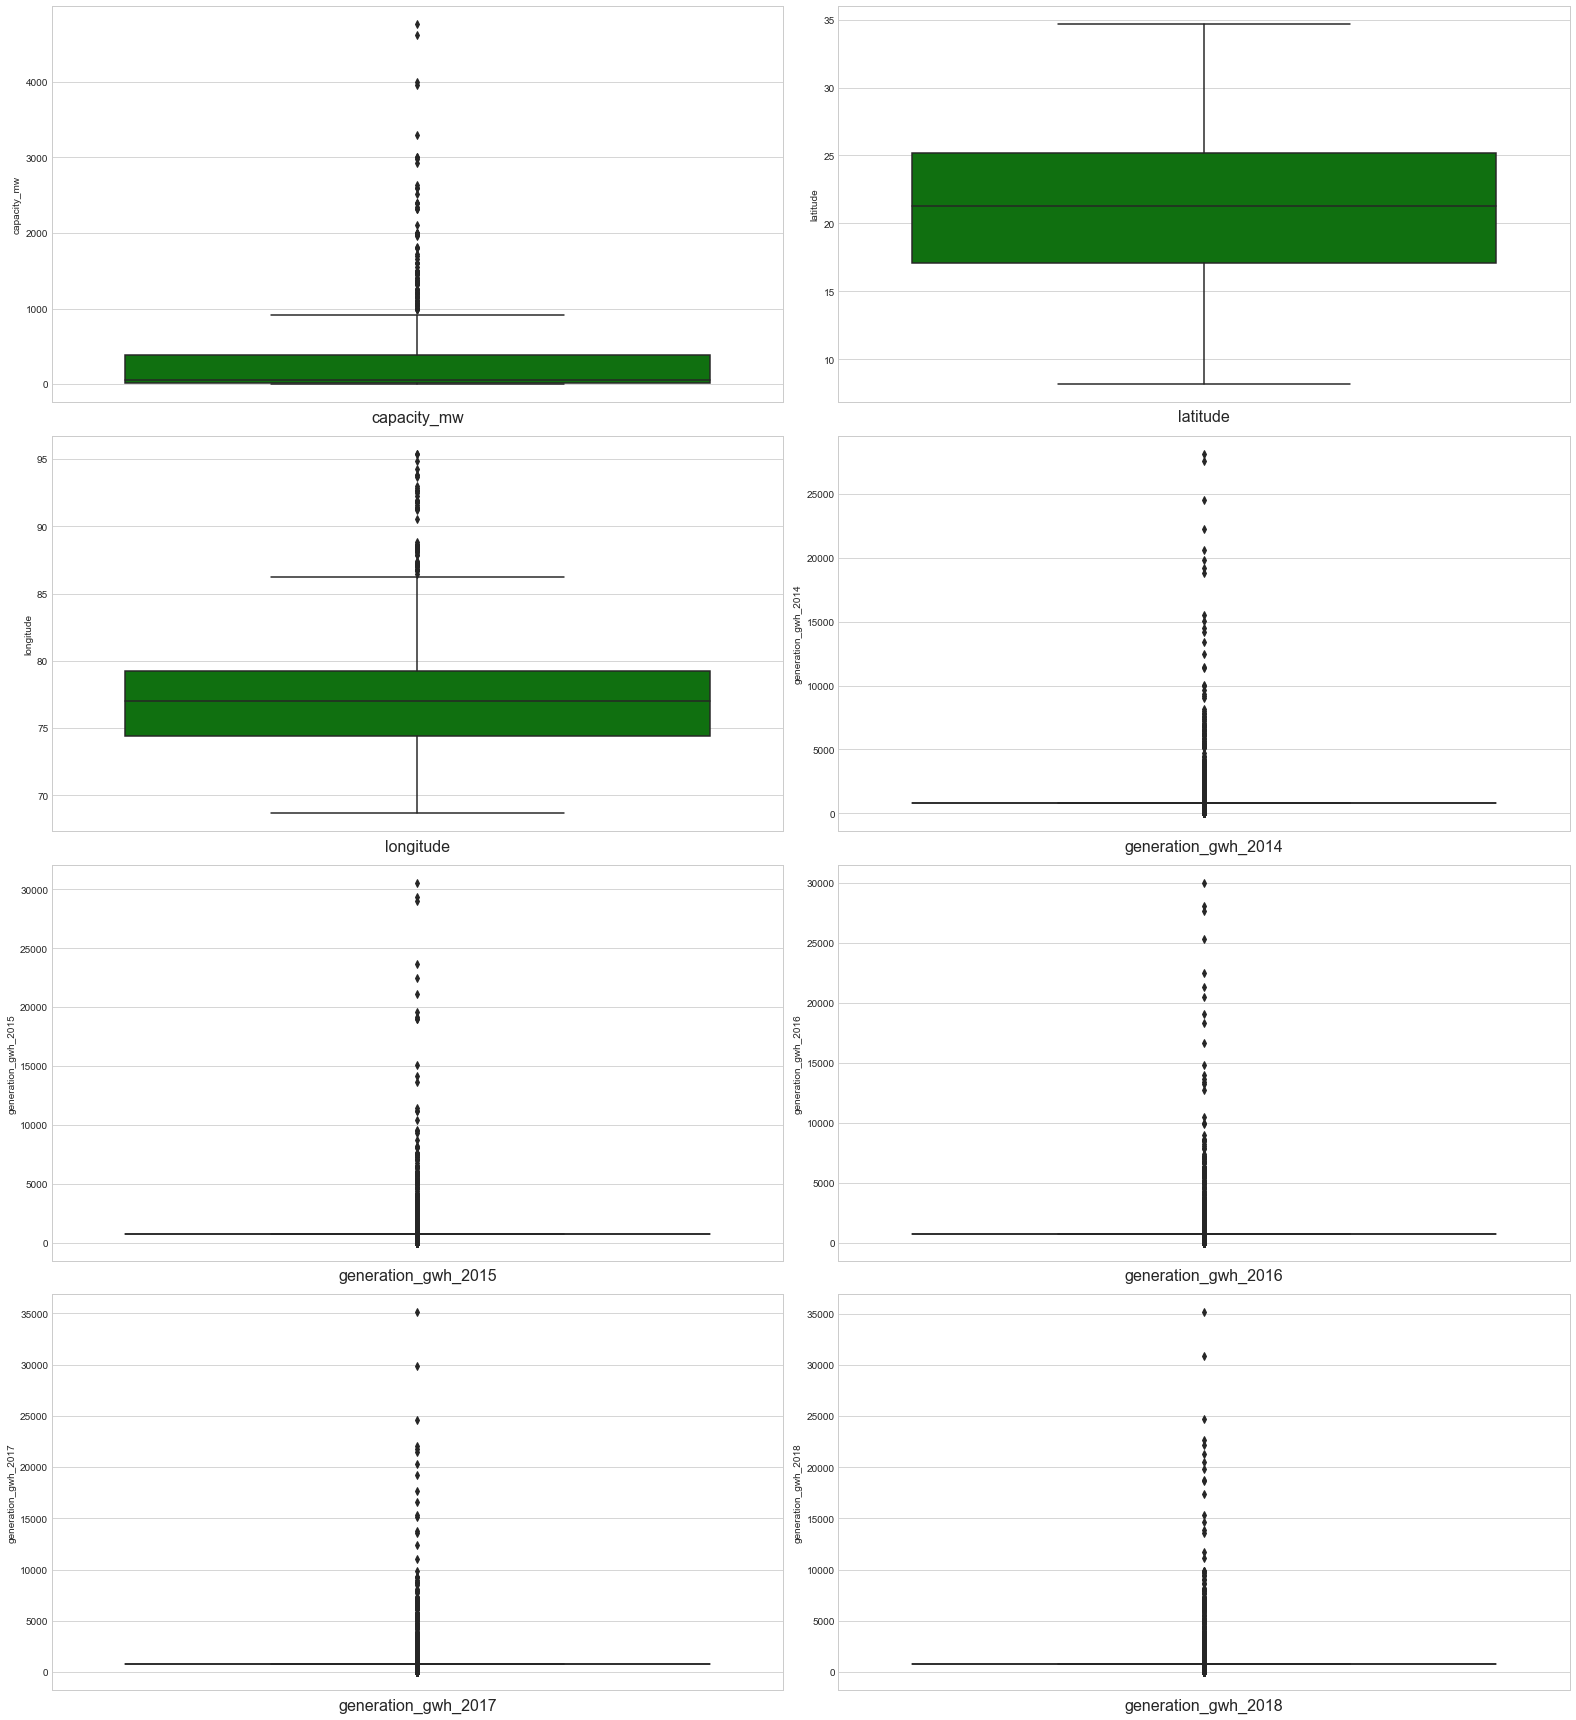

In [79]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(22,24))
num=1

for columns in continous_columns:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.boxplot(y=continous_columns[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

 same in here huge no. of outliers we need to remove the outliers 

# Feature Engineering

### converting the object columns into numeric, for this i am using the label encoder


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
df['primary_fuel'].unique()   # B=0, C=1 ,G=2, H=3, N=4, O=5, S=6, W=7  ==== label encoder encoded alphabetically

array(['Solar', 'Coal', 'Wind', 'Gas', 'Hydro', 'Biomass', 'Oil',
       'Nuclear'], dtype=object)

In [82]:
le=LabelEncoder()
df['primary_fuel']=le.fit_transform(df['primary_fuel'])


In [83]:
df['primary_fuel'].value_counts()

1    258
3    251
6    127
7    123
2     69
0     50
5     20
4      9
Name: primary_fuel, dtype: int64

In [84]:
df['other_fuel1'].unique()   # c=0  , g=1 , o=2

array(['Oil', 'Cogeneration', 'Gas'], dtype=object)

In [85]:
le=LabelEncoder()
df['other_fuel1']=le.fit_transform(df['other_fuel1'])

In [86]:
df['other_fuel1'].value_counts()

2    904
1      2
0      1
Name: other_fuel1, dtype: int64

In [87]:
df['geolocation_source']=le.fit_transform(df['geolocation_source'])

# Checking correlation 

In [88]:
df.corr()

,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
capacity_mw,1.000000,0.050984,0.195882,-0.380395,0.003105,0.211042,0.204865,0.793497,0.819676,0.853008,0.868338,0.884840
latitude,0.050984,1.000000,0.036362,-0.010204,0.036695,0.087937,-0.184275,0.058594,0.053869,0.047677,0.057897,0.055216
longitude,0.195882,0.036362,1.000000,-0.347948,0.030311,0.029893,0.252343,0.104649,0.121513,0.143459,0.151712,0.155063
primary_fuel,-0.380395,-0.010204,-0.347948,1.000000,0.004912,-0.054885,-0.483217,-0.240656,-0.249304,-0.259708,-0.263599,-0.271198
other_fuel1,0.003105,0.036695,0.030311,0.004912,1.000000,0.043267,-0.021408,0.005598,0.008950,0.013919,0.012077,0.018076
commissioning_year,0.211042,0.087937,0.029893,-0.054885,0.043267,1.000000,-0.073907,0.076971,0.108752,0.140964,0.153554,0.156927
geolocation_source,0.204865,-0.184275,0.252343,-0.483217,-0.021408,-0.073907,1.000000,0.101329,0.105571,0.108707,0.108639,0.113697
generation_gwh_2014,0.793497,0.058594,0.104649,-0.240656,0.005598,0.076971,0.101329,1.000000,0.963719,0.935067,0.904075,0.895143
generation_gwh_2015,0.819676,0.053869,0.121513,-0.249304,0.008950,0.108752,0.105571,0.963719,1.000000,0.973231,0.940229,0.933161
generation_gwh_2016,0.853008,0.047677,0.143459,-0.259708,0.013919,0.140964,0.108707,0.935067,0.973231,1.000000,0.973909,0.964988


## for better understanding using heatmap

<AxesSubplot:>

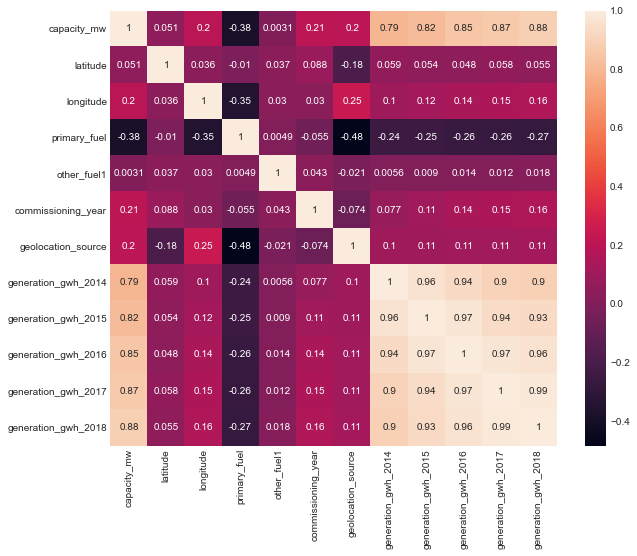

In [89]:
plt.figure(figsize=(10,8))
sb.heatmap(data=df.corr(),annot=True)

As other fuel is not showing any correlation i am droping it for now 


In [90]:
ddf=df.drop('other_fuel1',axis=1)
ddf

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375


<AxesSubplot:>

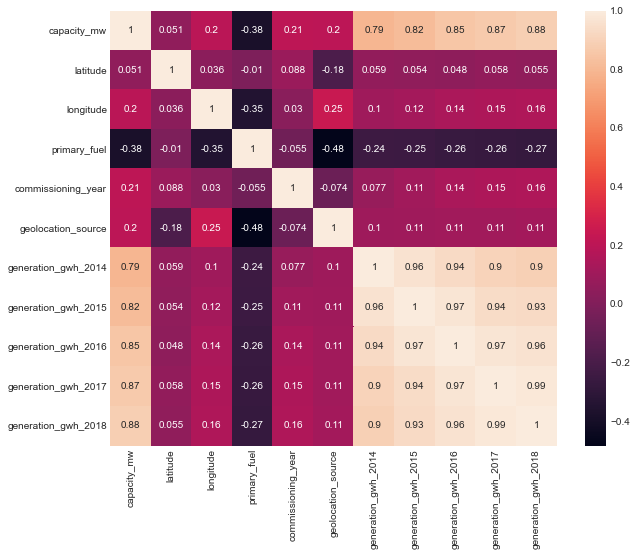

In [91]:
plt.figure(figsize=(10,8))
sb.heatmap(data=ddf.corr(),annot=True)

## In here we see that correlation in between the generation of energy in between the year has very strong correlation, or it show there is multicoliniearity problem here  

- Data in between the generation_gwh of year 2014,2015,2016,2017,2018 shows the correlation more than or equal to 90%
- although the also show very good correlation with capacity_mw

In [306]:
çontinous_columns=df[['capacity_mw', 'latitude', 'longitude',
        'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018']]

In [305]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel', 'other_fuel1',
       'commissioning_year', 'geolocation_source', 'generation_gwh_2014',
       'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017',
       'generation_gwh_2018'],
      dtype='object')

# Removing outliers:-

In [479]:
from scipy.stats import zscore

In [480]:
z=np.abs(zscore(continous_columns))
z

array([[0.54890755, 1.14980517, 0.87827973, ..., 0.27573671, 0.27556459,
        0.28839399],
       [0.38697729, 0.58731099, 0.59378844, ..., 0.27573671, 0.27556459,
        0.28839399],
       [0.48667885, 0.11617932, 1.68239437, ..., 0.27573671, 0.27556459,
        0.28839399],
       ...,
       [0.50990864, 0.97470651, 0.39167342, ..., 0.27573671, 0.27556459,
        0.28839399],
       [0.41749818, 0.51879322, 0.77286638, ..., 0.27573671, 0.27556459,
        0.28839399],
       [0.52516908, 1.85383409, 0.0024727 , ..., 0.27573671, 0.27556459,
        0.28839399]])

In [481]:
print(np.where(z>3))

(array([ 15,  15,  15,  15,  15, 143, 143, 143, 143, 143, 143, 147, 158,
       179, 183, 209, 209, 209, 209, 209, 209, 244, 308, 308, 308, 308,
       308, 308, 323, 333, 340, 360, 363, 364, 364, 364, 364, 364, 364,
       375, 416, 427, 482, 482, 493, 493, 493, 493, 493, 493, 494, 494,
       494, 494, 494, 494, 499, 519, 532, 546, 577, 623, 638, 648, 648,
       648, 648, 648, 648, 657, 657, 657, 657, 657, 657, 695, 695, 695,
       695, 695, 695, 721, 721, 721, 721, 721, 724, 724, 724, 724, 724,
       726, 726, 726, 726, 726, 726, 767, 786, 786, 786, 786, 786, 786,
       788, 808, 808, 808, 808, 808, 808, 818, 847, 880, 880, 880, 880,
       880, 880], dtype=int64), array([0, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 2, 2, 0, 3, 4, 5, 6, 7, 2,
       0, 3, 4, 5, 6, 7, 2, 2, 2, 2, 0, 0, 3, 4, 5, 6, 7, 0, 2, 2, 0, 7,
       0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 2, 2, 3, 2, 2, 3, 2, 0, 3, 4,
       5, 6, 7, 0, 3, 4, 5, 6, 7, 0, 3, 4, 5, 6, 7, 3, 4, 5, 6, 7, 3, 4,
       5, 6, 7, 0, 3, 4, 5,

In [482]:
len(np.where(z>3)[0])
continous_new=continous_columns[(z<3).all(axis=1)]
continous_columns

,capacity_mw,latitude,longitude,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,801.123775,711.181225,737.205450,817.977250,751.644375


In [483]:
df_new=ddf[(z<3).all(axis=1)]
print('shape of old data frame:--',df.shape)
print('shape of new data frame:--',df_new.shape)


shape of old data frame:-- (907, 12)
shape of new data frame:-- (866, 11)


In [484]:
df_new.head()
df_new.shape

(866, 11)

In [485]:
df_new

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,geolocation_source,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018
0,2.5,28.1839,73.2407,6,2011.0,1,801.123775,711.181225,737.205450,817.977250,751.644375
1,98.0,24.7663,74.6090,1,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
2,39.2,21.9038,69.3732,7,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
3,135.0,23.8712,91.3602,2,2004.0,2,617.789264,843.747000,886.004428,663.774500,626.239128
4,1800.0,21.9603,82.4091,1,2015.0,2,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000
...,...,...,...,...,...,...,...,...,...,...,...
902,1600.0,16.2949,77.3568,1,2016.0,2,801.123775,0.994875,233.596650,865.400000,686.500000
903,3.0,12.8932,78.1654,6,2001.0,0,801.123775,711.181225,737.205450,817.977250,751.644375
904,25.5,15.2758,75.5811,7,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375
905,80.0,24.3500,73.7477,1,2001.0,2,801.123775,711.181225,737.205450,817.977250,751.644375


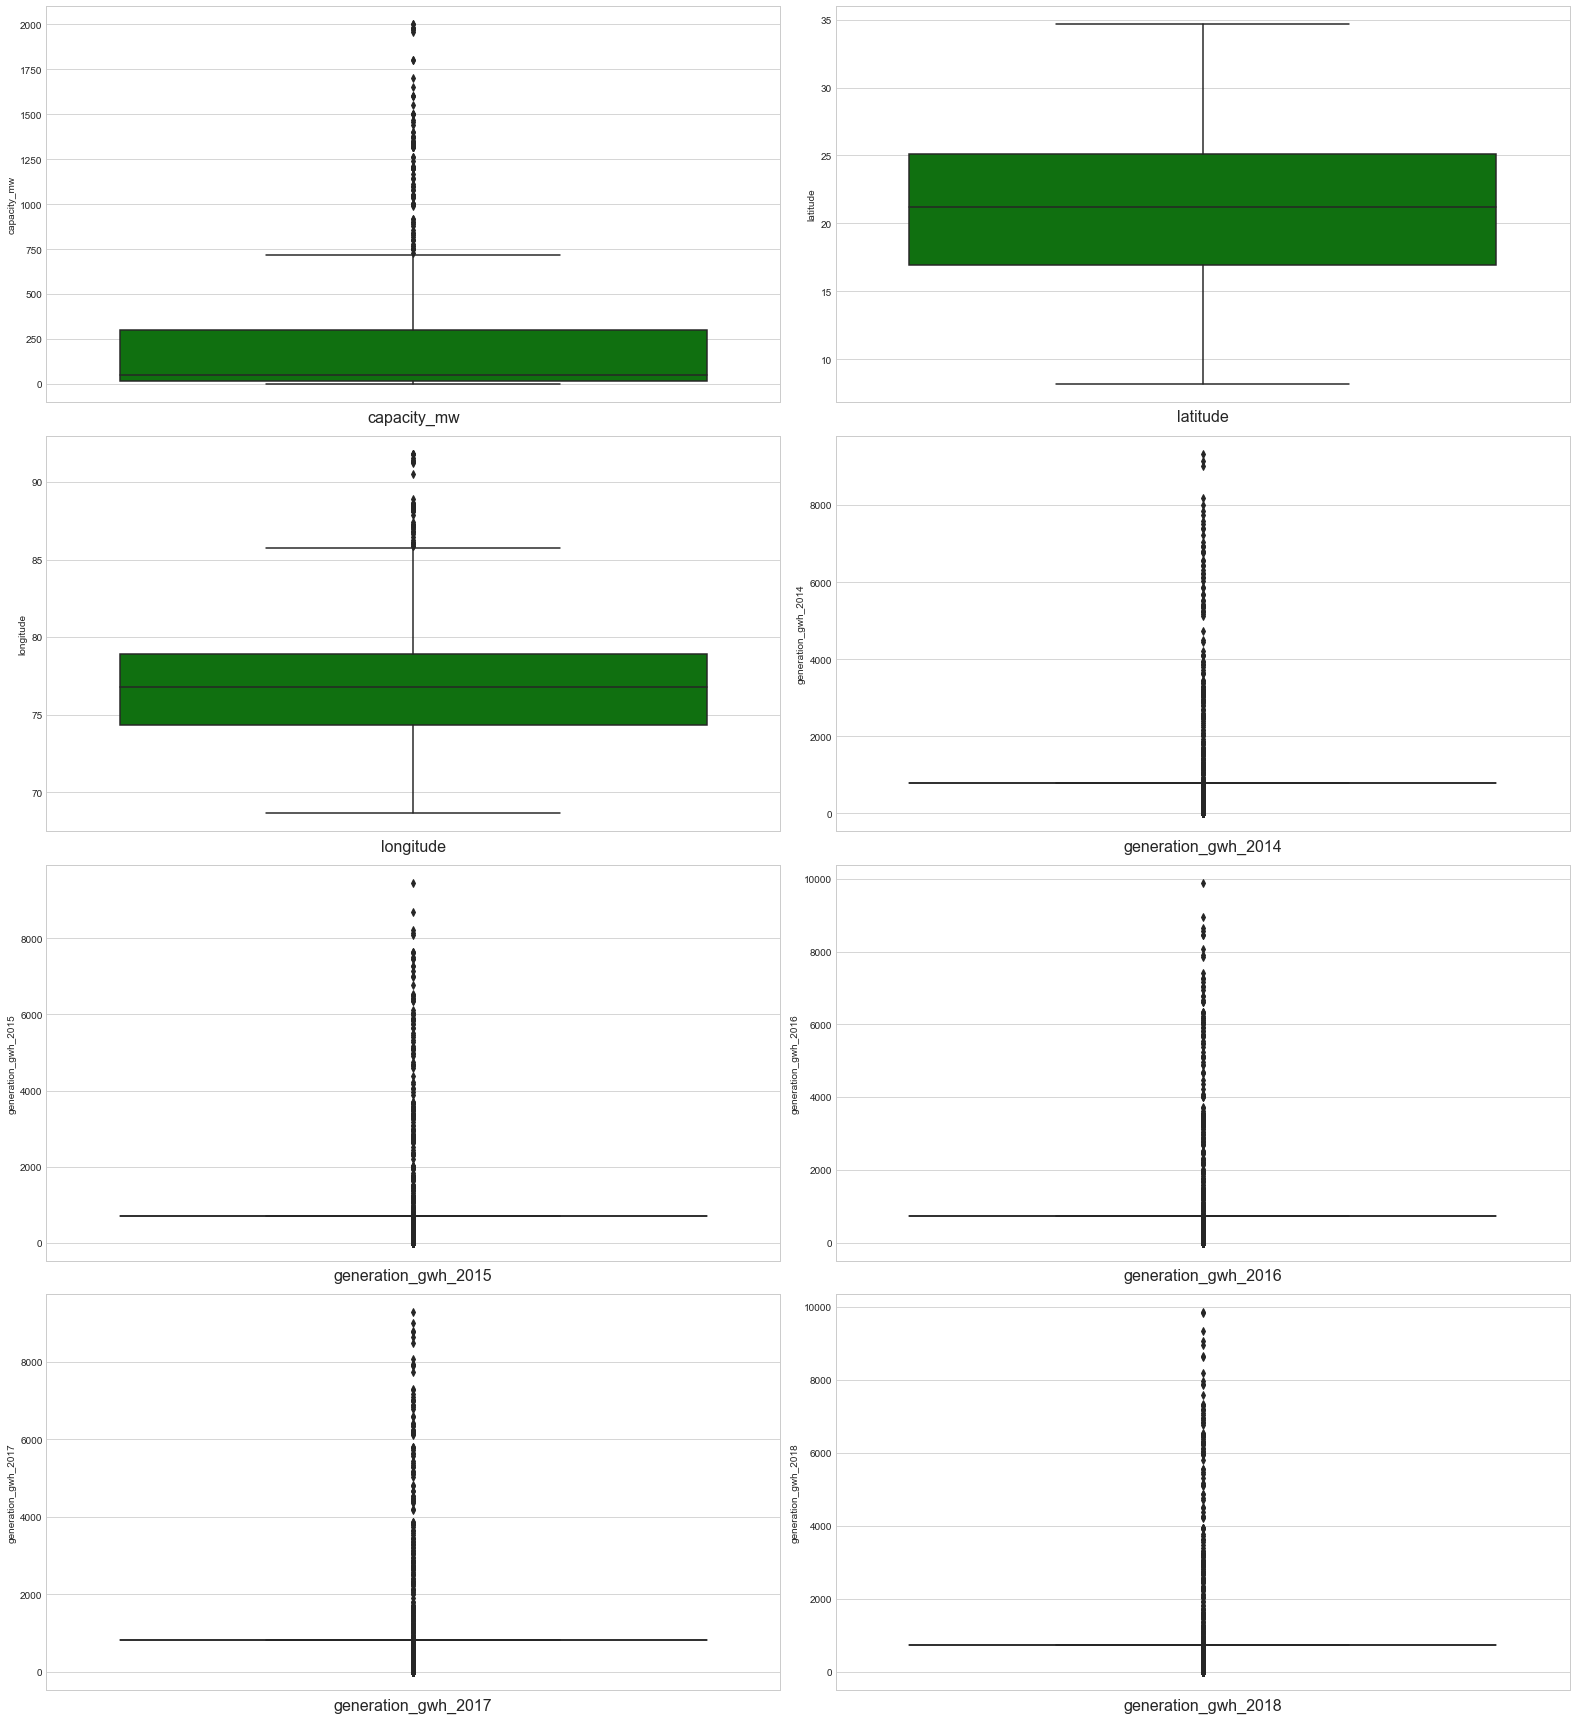

In [472]:
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-whitegrid')

plt.figure(figsize=(22,24))
num=1

for columns in continous_new:
    
    if num<=8:
        ax=plt.subplot(4,2,num)
        sb.boxplot(y=df_new[columns],color='g')
        plt.xlabel(columns,fontsize=16)
        
    num+=1
plt.tight_layout()

#### still having the huge number of outliers but i am keeping it beacuse the small dataset .

# checking VIF

In [355]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [352]:
X=df_new.drop('primary_fuel',axis=1)


In [356]:
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
vif_data.sort_values(by='VIF',ascending=False)


,feature,VIF
2,longitude,357.828926
3,commissioning_year,350.068764
8,generation_gwh_2017,32.429194
9,generation_gwh_2018,28.326734
7,generation_gwh_2016,24.674112
6,generation_gwh_2015,21.039445
1,latitude,13.594981
5,generation_gwh_2014,10.707146
4,geolocation_source,8.618039
0,capacity_mw,4.257199


# Skewness value

In [357]:
df_new.skew()

capacity_mw            2.029125
latitude              -0.110925
longitude              0.935570
primary_fuel           0.417203
commissioning_year    -1.741758
geolocation_source    -2.095811
generation_gwh_2014    2.997212
generation_gwh_2015    2.798104
generation_gwh_2016    2.736037
generation_gwh_2017    2.633766
generation_gwh_2018    2.701508
dtype: float64

# Feature selection :-

In [361]:
from sklearn.feature_selection import SelectKBest,f_classif

In [362]:
x=df_new.drop(['primary_fuel'],axis=1)
y=df_new['primary_fuel']

In [363]:
feature_selector=SelectKBest(score_func=f_classif,k=10)
fit=feature_selector.fit(x,y)

In [364]:
df_score =pd.DataFrame(fit.scores_)
df_score
df_columns=pd.DataFrame(x.columns)
feature_score=pd.concat([df_columns,df_score],axis=1)
feature_score.columns=['features','score']

In [366]:
feature_score

,features,score
0,capacity_mw,59.986920
1,latitude,14.573787
2,longitude,31.776750
3,commissioning_year,41.283500
4,geolocation_source,2539.096008
5,generation_gwh_2014,33.578635
6,generation_gwh_2015,37.578335
7,generation_gwh_2016,41.473970
8,generation_gwh_2017,43.019395
9,generation_gwh_2018,42.246220


I am going to select all the columns.

# Spliting feature and target columns and scaling the data

In [367]:
a=df_new.drop('primary_fuel',axis=1)
b=df_new['primary_fuel']

In [368]:
from sklearn.preprocessing import StandardScaler,minmax_scale
x_scaled=minmax_scale(a)    # to keep the continous data into range 0 to 1


In [418]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Logistic regression 

In [370]:
a_train,a_test,b_train,b_test=train_test_split(x_scaled,b,random_state=101,test_size=0.25)

In [371]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(a_train,b_train)

LogisticRegression()

In [372]:
lr_predict=lr.predict(a_test)

In [373]:
accuracy_score(b_test,lr_predict)

0.663594470046083

# DecisionTree

In [374]:
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier

In [375]:
dt=DecisionTreeClassifier()
dt.fit(a_train,b_train)

DecisionTreeClassifier()

In [376]:
dt_predict=dt.predict(a_test)

In [377]:
accuracy_score(b_test,dt_predict)

0.783410138248848

In [426]:
print('accuracy_score:-',accuracy_score(b_test,dt_predict),'\n')
print('classification report:-',classification_report(b_test,dt_predict))


accuracy_score:- 0.783410138248848 

classification report:-               precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.70      0.77      0.73        57
           2       0.38      0.20      0.26        15
           3       0.86      0.81      0.83        62
           4       0.00      0.00      0.00         1
           5       0.40      1.00      0.57         4
           6       1.00      1.00      1.00        40
           7       0.93      0.76      0.84        34

    accuracy                           0.78       217
   macro avg       0.58      0.66      0.59       217
weighted avg       0.80      0.78      0.78       217



In [378]:
et=ExtraTreeClassifier()
et.fit(a_train,b_train)

ExtraTreeClassifier()

In [379]:
et_predict=et.predict(a_test)

In [380]:
accuracy_score(b_test,et_predict)

0.7465437788018433

In [425]:
print('accuracy_score:-',accuracy_score(b_test,et_predict),'\n')
print('classification report:-',classification_report(b_test,et_predict))


accuracy_score:- 0.7465437788018433 

classification report:-               precision    recall  f1-score   support

           0       0.38      0.75      0.50         4
           1       0.69      0.75      0.72        57
           2       0.10      0.07      0.08        15
           3       0.81      0.77      0.79        62
           4       0.00      0.00      0.00         1
           5       0.29      0.50      0.36         4
           6       1.00      0.97      0.99        40
           7       0.84      0.76      0.80        34

    accuracy                           0.75       217
   macro avg       0.51      0.57      0.53       217
weighted avg       0.75      0.75      0.75       217



In [387]:
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier

# RandomForest

In [381]:

rd=RandomForestClassifier()
rd.fit(a_train,b_train)

RandomForestClassifier()

In [382]:
rd_predict=rd.predict(a_test)

In [383]:
accuracy_score(b_test,rd_predict)

0.8387096774193549

In [424]:
print('accuracy_score:-',accuracy_score(b_test,rd_predict),'\n')
print('classification report:-',classification_report(b_test,rd_predict))


accuracy_score:- 0.8387096774193549 

classification report:-               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.75      0.88      0.81        57
           2       0.60      0.20      0.30        15
           3       0.88      0.85      0.87        62
           4       0.00      0.00      0.00         1
           5       0.38      0.75      0.50         4
           6       1.00      1.00      1.00        40
           7       0.97      0.88      0.92        34

    accuracy                           0.84       217
   macro avg       0.63      0.66      0.62       217
weighted avg       0.84      0.84      0.83       217



# GradientBoosting

In [384]:
gd=GradientBoostingClassifier()
gd.fit(a_train,b_train)

GradientBoostingClassifier()

In [389]:
gd_predict=gd.predict(a_test)

In [390]:
accuracy_score(b_test,gd_predict)

0.7972350230414746

In [423]:
print('accuracy_score:-',accuracy_score(b_test,gd_predict),'\n')
print('classification report:-',classification_report(b_test,gd_predict))


accuracy_score:- 0.7972350230414746 

classification report:-               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.70      0.84      0.76        57
           2       0.27      0.20      0.23        15
           3       0.93      0.87      0.90        62
           4       0.00      0.00      0.00         1
           5       0.29      0.50      0.36         4
           6       1.00      1.00      1.00        40
           7       0.92      0.68      0.78        34

    accuracy                           0.80       217
   macro avg       0.58      0.60      0.58       217
weighted avg       0.81      0.80      0.80       217



# AdaBoost

In [393]:
ada=AdaBoostClassifier()
ada.fit(a_train,b_train)

AdaBoostClassifier()

In [394]:
ada_predict=ada.predict(a_test)

In [395]:
accuracy_score(b_test,ada_predict)

0.48847926267281105

In [420]:
print('accuracy_score:-',accuracy_score(b_test,ada_predict),'\n')
print('classification report:-',classification_report(b_test,ada_predict))


accuracy_score:- 0.48847926267281105 

classification report:-               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.50      0.26      0.34        57
           2       0.00      0.00      0.00        15
           3       0.35      0.84      0.50        62
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.97      0.99        40
           7       0.00      0.00      0.00        34

    accuracy                           0.49       217
   macro avg       0.23      0.26      0.23       217
weighted avg       0.42      0.49      0.41       217



# Bagging

In [408]:
bg=BaggingClassifier()
bg.fit(a_train,b_train)

BaggingClassifier()

In [409]:
bg_predict=bg.predict(a_test)

In [410]:
accuracy_score(b_test,bg_predict)

0.8248847926267281

In [427]:
print('accuracy_score:-',accuracy_score(b_test,bg_predict),'\n')
print('classification report:-',classification_report(b_test,bg_predict))


accuracy_score:- 0.8248847926267281 

classification report:-               precision    recall  f1-score   support

           0       0.50      0.75      0.60         4
           1       0.74      0.88      0.80        57
           2       0.29      0.13      0.18        15
           3       0.92      0.89      0.90        62
           4       0.00      0.00      0.00         1
           5       0.29      0.50      0.36         4
           6       1.00      1.00      1.00        40
           7       0.93      0.79      0.86        34

    accuracy                           0.82       217
   macro avg       0.58      0.62      0.59       217
weighted avg       0.82      0.82      0.82       217



# Support vector machine

In [412]:
from sklearn.svm import SVC
svc=SVC()

In [413]:
svc.fit(a_train,b_train)

SVC()

In [414]:
svc_predict=svc.predict(a_test)

In [415]:
accuracy_score(b_test,svc_predict)

0.7142857142857143

In [428]:
print('accuracy_score:-',accuracy_score(b_test,svc_predict),'\n')
print('classification report:-',classification_report(b_test,svc_predict))


accuracy_score:- 0.7142857142857143 

classification report:-               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.61      0.75      0.68        57
           2       0.00      0.00      0.00        15
           3       0.82      0.76      0.79        62
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         4
           6       1.00      0.97      0.99        40
           7       0.51      0.76      0.61        34

    accuracy                           0.71       217
   macro avg       0.37      0.41      0.38       217
weighted avg       0.66      0.71      0.68       217



# Hyperparameter tuning

In [434]:
from sklearn.model_selection import GridSearchCV

In [430]:
rd=RandomForestClassifier()

In [450]:
para= {'n_estimators':[50],'criterion':['gini','entropy'],
'max_depth':range(3,8),
   'min_samples_split':range(5,10),
   'min_samples_leaf':range(5,12),
     'max_leaf_nodes':range(4,8)}

In [451]:
grid=GridSearchCV(RandomForestClassifier(),param_grid=para)

In [452]:
grid.fit(a_train,b_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(3, 8),
                         'max_leaf_nodes': range(4, 8),
                         'min_samples_leaf': range(5, 12),
                         'min_samples_split': range(5, 10),
                         'n_estimators': [50]})

In [453]:
grid.best_params_

{'criterion': 'gini',
 'max_depth': 6,
 'max_leaf_nodes': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 7,
 'n_estimators': 50}

In [454]:
rd1=RandomForestClassifier(criterion='gini',
 max_depth= 6,
 max_leaf_nodes=6,
 min_samples_leaf= 5,
 min_samples_split= 7,
 n_estimators=50)

In [455]:
rd1.fit(a_train,b_train)

RandomForestClassifier(max_depth=6, max_leaf_nodes=6, min_samples_leaf=5,
                       min_samples_split=7, n_estimators=50)

In [456]:
rd1_predict=rd1.predict(a_test)

In [457]:
accuracy_score(b_test,rd1_predict)

0.7511520737327189

clearly not improving accuracy_score, so saving earlier model

In [349]:
from sklearn.model_selection import cross_val_score

In [416]:
cross_val_score(RandomForestClassifier(),a_train,b_train,cv=8).mean()

0.8012270400481782

In [471]:
import pickle
with open(filename,'wb') as file:
    pickle.dump(rd,file)

# Second phase of question 
 
### 2.problem statement :- we need to work on dataset for prediction of capacity_mw [This is regression problem]

In [487]:
df_new.reset_index(inplace=True)

In [490]:
x=df_new.drop(['index','capacity_mw'],axis=1)
x_scaled=minmax_scale(x)

In [525]:
y=df_new['capacity_mw']

In [526]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,random_state=201,test_size=0.25)

In [529]:
y_train

7       192.00
227     205.24
206      39.00
842    1040.00
335      26.00
        ...   
501     270.00
353    1240.00
865      16.50
553    1170.00
512      33.20
Name: capacity_mw, Length: 649, dtype: float64

# Model building

In [557]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.neighbors import KNeighborsRegressor

# LinearRegression

In [531]:
li=LinearRegression()

In [532]:
li.fit(x_train,y_train)

LinearRegression()

In [533]:
li_predict=li.predict(x_test)

In [534]:
r2_score(y_test,li_predict)

0.6410809278512021

# DecisionTreeRegressor

In [535]:
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [536]:
dtr_predict=dtr.predict(x_test)

In [537]:
r2_score(y_test,dtr_predict)

0.5959059708982648

# BaggingRegressor

In [538]:
Bgr=BaggingRegressor()
Bgr.fit(x_train,y_train)
Bgr_predict=Bgr.predict(x_test)

In [539]:
r2_score(y_test,Bgr_predict)

0.7132772044002185

# AdaBoostRegressor

In [541]:
adr=AdaBoostRegressor()

In [542]:
adr.fit(x_train,y_train)

AdaBoostRegressor()

In [543]:
adr_predict=adr.predict(x_test)

In [544]:
r2_score(y_test,adr_predict)

0.4809189893811274

# RandomForestRegressor

In [547]:
rdr=RandomForestRegressor()
rdr.fit(x_train,y_train)

RandomForestRegressor()

In [549]:
rdr_predict=rdr.predict(x_test)

In [551]:
r2_score(y_test,rdr_predict)

0.7392872745688716

# GradientBoostingRegressor

In [553]:
gdr=GradientBoostingRegressor()
gdr.fit(x_train,y_train)


GradientBoostingRegressor()

In [555]:
gdr_predict=gdr.predict(x_test)

In [556]:
r2_score(y_test,gdr_predict)

0.6928526386267236

# KNeighborsRegressor

In [561]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [563]:
knn_predict=knn.predict(x_test)

In [564]:
r2_score(y_test,knn_predict)

0.7272487520472335

# Hyperparameter tuning

In [ ]:
RandomForestRegressor()

In [572]:
para={'criterion':['squared_error','squared_error','absolute_error','poisson'],
'max_depth':range(6,8),
'min_samples_split':range(10,15),
'min_samples_leaf':range(10,14),
'max_leaf_nodes':range(10,14)}

In [574]:
grid=GridSearchCV(RandomForestRegressor(),param_grid=para,cv=5)

In [575]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'squared_error',
                                       'absolute_error', 'poisson'],
                         'max_depth': range(6, 8),
                         'max_leaf_nodes': range(10, 14),
                         'min_samples_leaf': range(10, 14),
                         'min_samples_split': range(10, 15)})

In [576]:
grid.best_params_

{'criterion': 'squared_error',
 'max_depth': 7,
 'max_leaf_nodes': 13,
 'min_samples_leaf': 10,
 'min_samples_split': 10}

In [577]:
rdreg=RandomForestRegressor(criterion= 'squared_error',max_depth= 7,max_leaf_nodes= 13,min_samples_leaf= 10,min_samples_split=10)

In [579]:
rdreg.fit(x_train,y_train)

RandomForestRegressor(max_depth=7, max_leaf_nodes=13, min_samples_leaf=10,
                      min_samples_split=10)

In [582]:
rdreg_predict=rdreg.predict(x_test)
r2_score(y_test,rdreg_predict)

0.7753761981222984

- Through hyperparameter tuning we see that r2_score is increases.
- earlier it has 0.7392 and now we have 0.7753 
- saving improved model here 

# Cross validation

In [565]:
from sklearn.model_selection import cross_val_score

In [585]:
cross_val_score(RandomForestRegressor(),x_train,y_train,cv=8).mean()

0.7898640736146783

after hyperparameter we see that the difference between is 0.014487875492379843 which is not even 1 %. so this model work in real time and saving the model 

In [587]:
filename='power project for capacity_mw'
with open(filename,'wb') as file:
    pickle.dump(rdreg,file)